## 1. Business Case: 
#### Identify and analyze the key factors influencing customer churn in the highly competitive telecom market of Europe, providing insights into the drivers behind customer migration.

#### Develop a predictive churn risk scoring model to quantify the likelihood of customer churn, enabling No-Churn Telecom to strategically target retention campaigns and reduce customer attrition rates.

## 2. Importing Libraries

In [61]:
import os
import mysql.connector

#Data Analysis and Data Wrangling
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

#Data Imbalance Treratment Libraries
from imblearn.over_sampling import SMOTE

#Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, make_scorer
from sklearn.metrics import cohen_kappa_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from itertools import cycle
from sklearn.utils.class_weight import compute_sample_weight


## 3. Building connection to the client database server

In [132]:
!pip install pymysql
!pip install mysql-connector

In [62]:
# making connections to database server
connection= mysql.connector.connect(host='18.136.157.135',
                                    user= 'dm_team3',
                                    password= 'DM!$!Team!27@9!20&')

In [63]:
# check the number of databases available on the server
cursor= connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_telecom',)


In [64]:
# making connections to specific database server
connection= mysql.connector.connect(host='18.136.157.135',
                                    user= 'dm_team3',
                                    password= 'DM!$!Team!27@9!20&',
                                    database= 'project_telecom')

In [65]:
pd.read_sql_query("show tables", connection)

,Tables_in_project_telecom
0,telecom_churn_data


## 4. Load the data

In [66]:
tcp=pd.read_sql_query("select * from telecom_churn_data", connection)
tcp

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [11]:
# Display the columns of the DataFrame
print("Columns:", tcp.columns)

# Display the shape of the DataFrame
print("Shape:", tcp.shape)

Columns: Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')
Shape: (4617, 21)


## 5. Rename the columns for clear understanding

In [67]:
column_mapping = {
    'columns1': 'State',
    'columns2': 'Account Length',
    'columns3': 'Area Code',
    'columns4': 'Phone',
    'columns5': 'International Plan',
    'columns6': 'VMail Plan',
    'columns7': 'VMail Message',
    'columns8': 'Day Mins',
    'columns9': 'Day Calls',
    'columns10': 'Day Charge',
    'columns11': 'Eve Mins',
    'columns12': 'Eve Calls',
    'columns13': 'Eve Charge',
    'columns14': 'Night Mins',
    'columns15': 'Night Calls',
    'columns16': 'Night Charge',
    'columns17': 'International Mins',
    'columns18': 'International calls',
    'columns19': 'International Charge',
    'columns20': 'CustServ Calls',
    'columns21': 'Churn'
}

# Rename the columns using the mapping dictionary
tcp.rename(columns=column_mapping, inplace=True)
tcp

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


## 6. Domain Analysis
State Distribution: The dataset includes customers from different states such as Washington (WA), Indiana (IN), North Dakota (ND), South Dakota (SD), and California (CA). Analyzing churn rates across different states could provide insights into regional trends and preferences.

Account Length: The duration of account length varies across customers, with values ranging from 62 to 185. Understanding how account length influences churn behavior can help in customer retention strategies.

Area Code: Customers belong to different area codes, including 415, 408, and 510. Area code analysis might reveal geographical patterns in churn rates and customer behavior.

International Plan and VMail Plan: These binary features indicate whether customers have opted for international plans or voicemail plans. Analyzing churn behavior based on plan subscriptions can identify the effectiveness of these services in customer retention.

VMail Message: This column indicates the number of voicemail messages. Understanding the relationship between voicemail usage and churn can help in optimizing voicemail service offerings.

Usage Patterns: Various call and usage metrics such as Day Mins, Day Calls, Eve Mins, Eve Calls, Night Mins, Night Calls, International Mins, and International Calls provide insights into customers' usage patterns throughout the day and night, as well as for international calls.

Churn Label: The 'Churn' column denotes whether a customer has churned (True) or not (False). Analyzing churn patterns and identifying factors contributing to churn is crucial for developing retention strategies and improving customer satisfaction.

Customer Service Calls: The 'CustServ Calls' column indicates the number of customer service calls made by customers. Higher numbers of customer service calls might indicate dissatisfaction or issues with the service, potentially leading to churn.

By analyzing these features and their relationships, telecom companies can gain valuable insights into customer behavior, preferences, and satisfaction levels, enabling them to develop targeted retention strategies and improve overall customer experience.issues, and potential churn predictors.

Churn: Identification of churned customers versus non-churned customers is the primary focus of the analysis and serves as the target variable for predictive modeling and retention strategies.

## 7. Basic Checks

In [68]:
pd.set_option('display.max_columns', None)

In [230]:
tcp.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [231]:
tcp.shape

(4617, 21)

- The shape (4617, 21) indicates that our dataset consists of 4617 observations and 21 features.

In [11]:
tcp.sample(5)

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
1387,CT,212,415,366-6751,no,no,0,126,96,21.42,144.3,80,12.27,302.8,102,13.63,7.6,3,2.05,1,False.
1277,FL,68,415,360-7076,no,yes,24,176,118,29.92,277.9,116,23.62,174.7,71,7.86,14.7,7,3.97,1,False.
3186,AZ,108,415,415-6333,no,no,0,193.3,126,32.86,154.7,85,13.15,174.8,98,7.87,9.4,6,2.54,3,False.
760,NC,128,510,417-5067,no,no,0,187.3,84,31.84,270.8,95,23.02,206.4,68,9.29,10.1,5,2.73,1,False.
1209,CT,144,510,416-9021,yes,yes,35,174.8,127,29.72,219.6,93,18.67,255.8,90,11.51,12.8,3,3.46,0,False.


- Our target variable, Churn, exhibits two outcomes, indicating a binary classification problem.

In [120]:
tcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International Plan    4617 non-null   object
 5   VMail Plan            4617 non-null   object
 6   VMail Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

### Insights:
Data Types: All columns are currently labeled as object type. However, based on their names and expected content, many of these columns appear to contain numerical data, such as Account Length, Day Mins, Day Calls, etc.

Non-Null Count: There are no missing values in any of the columns, as indicated by the "Non-Null Count" entries for each column, all of which show 4617 non-null values.

Memory Usage: The DataFrame occupies 757.6+ KB of memory, which is reasonable given the number of entries (4617) and the number of columns (21).

Column Labels: The column labels provide information about various features, including State, Account Length, Area Code, Phone, International Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, International Mins, International calls, International Charge, CustServ Calls, and Churn.

Data Integrity: Since all columns have the same count of non-null values, there don't appear to be any missing or incomplete entries in the dataset.

#### In summary, the dataset contains a variety of features, primarily numerical, but currently stored as object types. The next step would involve converting appropriate columns to their correct numerical data types for further analysis and modeling. Additionally, exploring the distribution and characteristics of each column would provide more insights into the dataset.

In [232]:
tcp.describe().T

,count,unique,top,freq
State,4617,51,WV,149
Account Length,4617,218,90,63
Area Code,4617,3,415,2299
Phone,4617,4617,382-4657,1
International Plan,4617,2,no,4171
VMail Plan,4617,2,no,3381
VMail Message,4617,47,0,3381
Day Mins,4617,1901,154,10
Day Calls,4617,123,102,108
Day Charge,4617,1901,26.18,10


### Insights:
State: There are 51 unique states represented in the dataset, with 'WV' (West Virginia) being the most frequent state, appearing 149 times.

Account Length: The account lengths range from 1 to 218 months, with 90 months being the most frequent account length, occurring 63 times.

Area Code: There are 3 unique area codes: 408, 415, and 510. The most common area code is 415, appearing 2299 times.

Phone: Each phone number appears only once in the dataset, indicating that it might not be useful for modeling and can be dropped.

International Plan: There are 2 unique values indicating whether customers have an international plan: 'yes' and 'no'. The majority of customers (4171) do not have an international plan.

VMail Plan: Similar to the international plan, there are 2 unique values for VMail Plan: 'yes' and 'no', with 'no' being more common (3381 occurrences).

VMail Message: The number of VMail messages ranges from 0 to 47, with 0 being the most common (3381 occurrences).

Day Mins, Eve Mins, Night Mins, International Mins: These columns represent the number of minutes spent on calls during the day, evening, night, and international calls, respectively. The range of minutes varies across these columns.

Day Calls, Eve Calls, Night Calls, International calls: These columns represent the number of calls made during the day, evening, night, and international calls, respectively.

Day Charge, Eve Charge, Night Charge, International Charge: These columns represent the corresponding charges for the calls made during the day, evening, night, and international calls.

CustServ Calls: This column represents the number of customer service calls made by customers, ranging from 1 to 10 calls.

Churn: The target variable indicates whether a customer has churned or not. There are 2 unique values: 'False.' (indicating no churn) and 'True.' (indicating churn), with the majority of customers (3961) not churning.

## 8. Data Pre-Processing

- Seen from the basic checks that we dont have any null values and duplicated values, our next step would be converting appropriate columns to their correct numerical data types for further analysis and modeling.

In [69]:
tcp.duplicated().sum()

0

In [123]:
# For each column in the DataFrame, print unique values
for column in tcp.columns:
    unique_values = tcp[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in State: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in Account Length: ['128' '107' '137' '84' '75' '118' '121' '147' '117' '141' '65' '74' '168'
 '95' '62' '161' '85' '93' '76' '73' '77' '130' '111' '132' '174' '57'
 '54' '20' '49' '142' '172' '12' '72' '36' '78' '136' '149' '98' '135'
 '34' '160' '64' '59' '119' '97' '52' '60' '10' '96' '87' '81' '68' '125'
 '116' '38' '40' '43' '113' '126' '150' '138' '162' '90' '50' '82' '144'
 '46' '70' '55' '106' '94' '155' '80' '104' '99' '120' '108' '122' '157'
 '103' '63' '112' '41' '193' '61' '92' '131' '163' '91' '127' '110' '140'
 '83' '145' '56' '151' '139' '6' '115' '146' '185' '148' '32' '25' '179'
 '67' '19' '170' '164' '51' '208' '53' '105' '66' '86' '35' '88' '123'
 '45' '100' '215' '22' '33' 

### 8.1 Keeping datatypes in the right format.

In [70]:
# Define   the columns that need to be converted to numerical data types
numerical_columns = ['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
                     'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
                     'International Mins', 'International calls', 'International Charge', 'CustServ Calls']

# Convert the data type of numerical columns to their respective numerical data types
for column in numerical_columns:
    tcp[column] = pd.to_numeric(tcp[column])


In [71]:
# Select only the columns with categorical variables
categorical_columns = tcp.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['State', 'Phone', 'International Plan', 'VMail Plan', 'Churn']

In [80]:
# Iterate through each categorical column and print unique values
for column in categorical_columns:
    unique_values = tcp[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in State: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in Phone: [' 382-4657' ' 371-7191' ' 358-1921' ... ' 338-4794' ' 355-8388'
 ' 409-6884']
Unique values in International Plan: [' no' ' yes']
Unique values in VMail Plan: [' yes' ' no']
Unique values in Churn: [' False.' ' True.']


### 8.2 Outlier detection and handling

In [81]:
numerical_columns

['Account Length',
 'Area Code',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'International Mins',
 'International calls',
 'International Charge',
 'CustServ Calls']

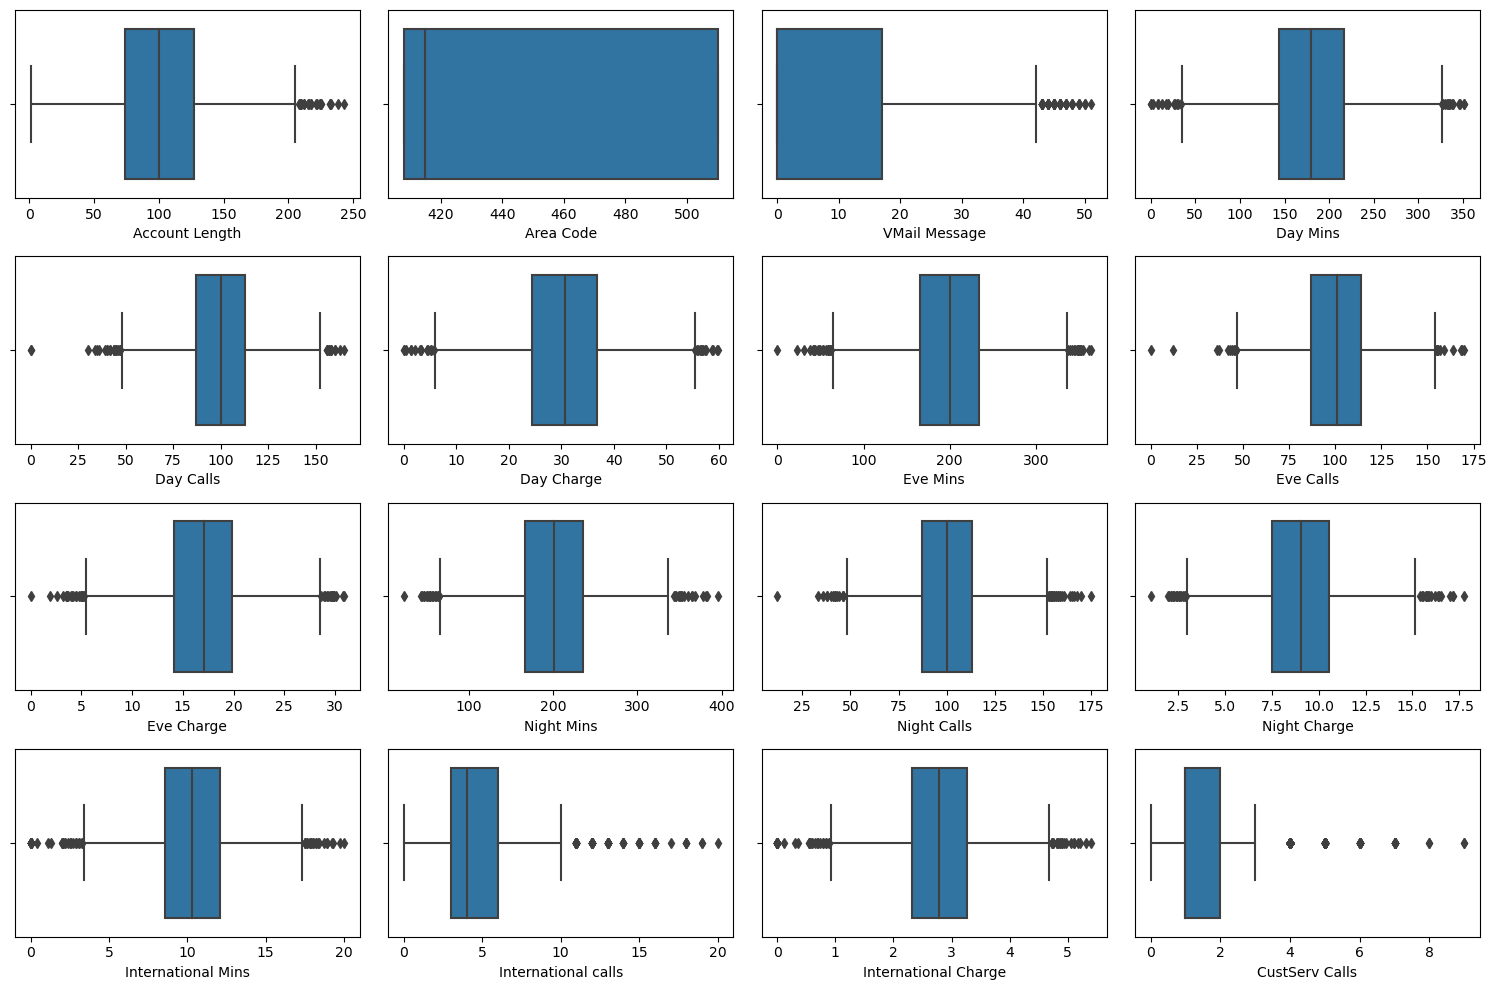

In [236]:
 # Select numerical columns for outlier detection
numerical_columns = ['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
                     'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 
                     'Night Calls', 'Night Charge', 'International Mins', 'International calls',
                     'International Charge', 'CustServ Calls']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=col, data=tcp)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

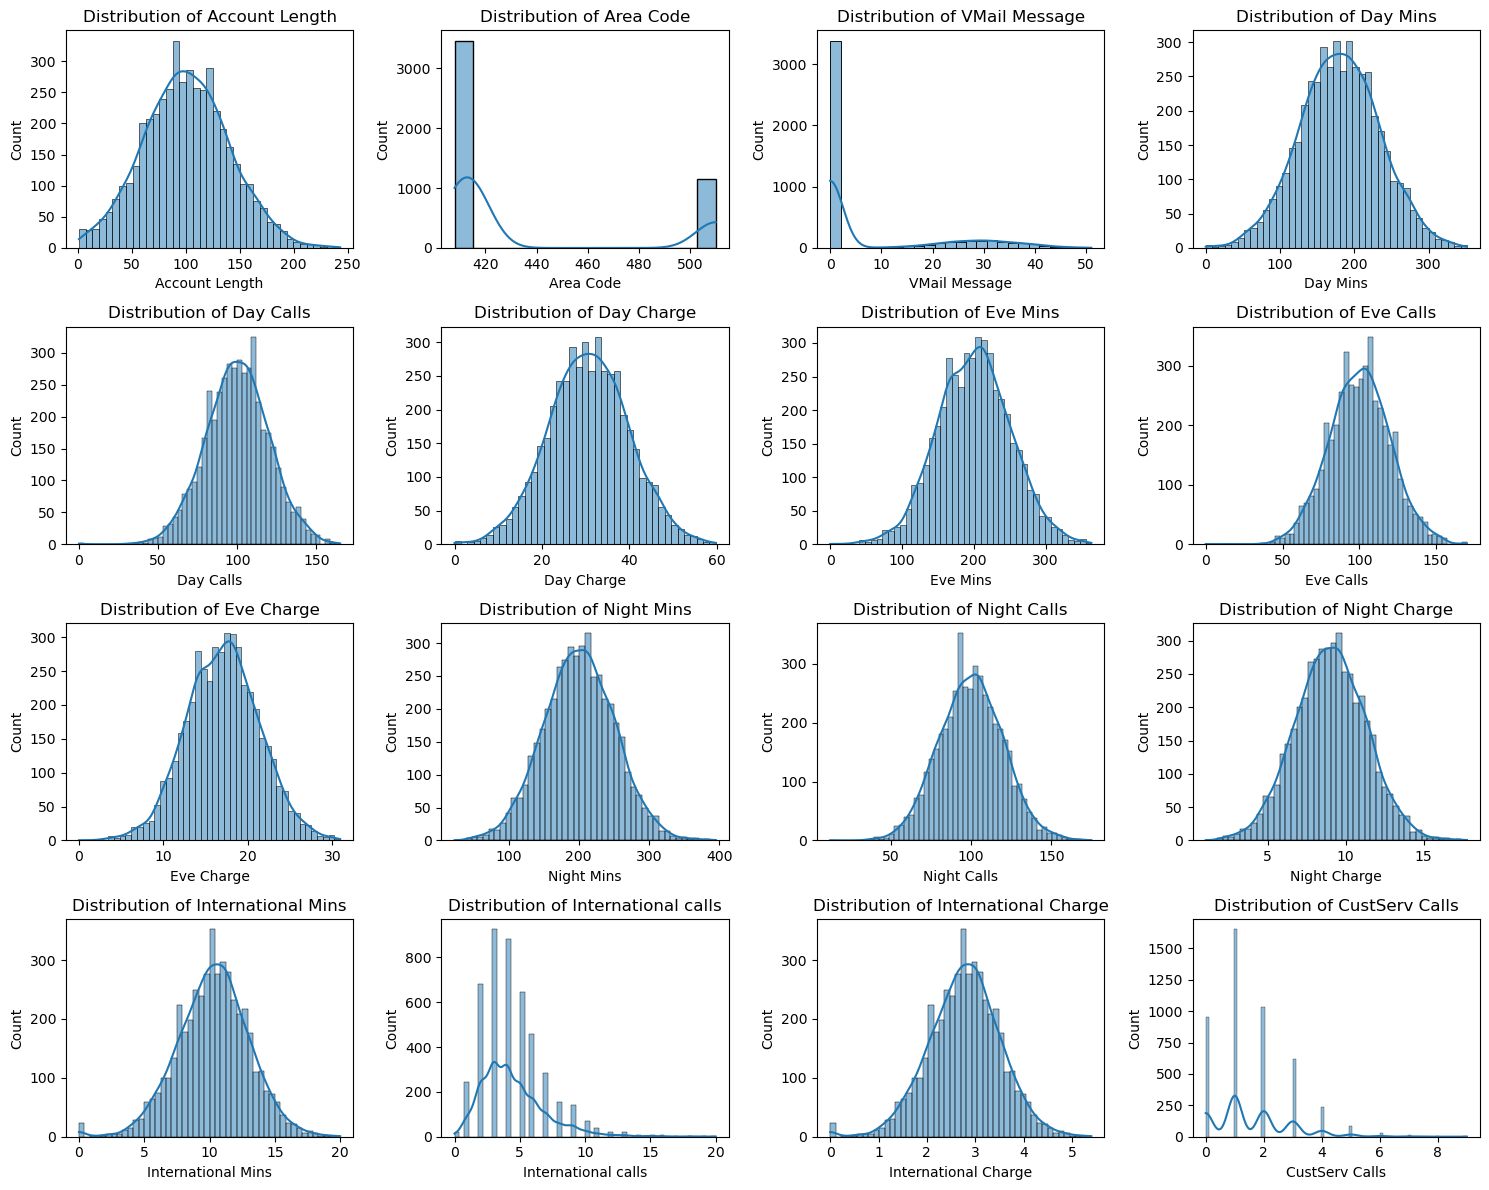

In [237]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(data=tcp, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Show the plot
plt.tight_layout()
plt.show()

In [72]:
normalized_columns= ['Account Length','Day Mins', 'Day Calls','Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 
                     'Night Calls', 'Night Charge', 'International Mins','International Charge']

In [73]:
non_normalized=['Area Code', 'VMail Message','International calls', 'CustServ Calls']

In [55]:
# # Define the columns
# normalized_columns = ['Account Length', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 
#                       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 
#                       'International Mins', 'International Charge']
# non_normalized_columns = ['Area Code', 'VMail Message', 'International calls', 'CustServ Calls']

# # Z-score method for normalized columns
# z_score_threshold = 3
# z_score_outliers = {}

# for column in normalized_columns:
#     z_scores = np.abs((tcp[column] - tcp[column].mean()) / tcp[column].std())
#     outliers_count = np.sum(z_scores > z_score_threshold)
#     outliers_percentage = (outliers_count / len(tcp)) * 100
#     z_score_outliers[column] = outliers_percentage

# # IQR method for non-normalized columns
# iqr_outliers = {}
# for column in non_normalized_columns:
#     Q1 = tcp[column].quantile(0.25)
#     Q3 = tcp[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers_count = np.sum((tcp[column] < lower_bound) | (tcp[column] > upper_bound))
#     outliers_percentage = (outliers_count / len(tcp)) * 100
#     iqr_outliers[column] = outliers_percentage

# # Create DataFrame to display results
# outliers_tcp = pd.DataFrame({'Z-score Outliers (%)': z_score_outliers, 'IQR Outliers (%)': iqr_outliers})
# print(outliers_tcp)

                      Z-score Outliers (%)  IQR Outliers (%)
Account Length                    0.238250               NaN
Day Mins                          0.238250               NaN
Day Calls                         0.281568               NaN
Day Charge                        0.238250               NaN
Eve Mins                          0.281568               NaN
Eve Calls                         0.173273               NaN
Eve Charge                        0.303227               NaN
Night Mins                        0.324886               NaN
Night Calls                       0.303227               NaN
Night Charge                      0.324886               NaN
International Mins                0.758068               NaN
International Charge              0.758068               NaN
Area Code                              NaN          0.000000
VMail Message                          NaN          1.104613
International calls                    NaN          2.317522
CustServ Calls          

In [144]:
# # Handle outliers using Z-score method for normalized columns
# for column in normalized_columns:
#     z_scores = np.abs((tcp[column] - tcp[column].mean()) / tcp[column].std())
#     outliers_mask = z_scores > z_score_threshold
#     outliers_percentage = outliers_mask.mean() * 100
#     if outliers_percentage < 2:
#         tcp.loc[outliers_mask, column] = tcp[column].median()  # Replace outliers with median

# # # Handle outliers using IQR method for non-normalized columns
# # for column in non_normalized_columns:
# #     Q1 = tcp[column].quantile(0.25)
# #     Q3 = tcp[column].quantile(0.75)
# #     IQR = Q3 - Q1
# #     lower_bound = Q1 - 1.5 * IQR
# #     upper_bound = Q3 + 1.5 * IQR
# #     outliers_mask = (tcp[column] < lower_bound) | (tcp[column] > upper_bound)
# #     outliers_percentage = outliers_mask.mean() * 100
# #     if outliers_percentage < 2:
# #         tcp.loc[outliers_mask, column] = tcp[column].median()  # Replace outliers with median

- We are skipping handling outliers in non-normalized columns because of data characteristics; the characteristics of the data in these columns might be such that the outliers are more pronounced or difficult to handle, leading to changes in the percentage of outliers after handling.

In [145]:
# # Recalculate outliers percentages after handling outliers

# # Z-score method for normalized columns
# z_score_outliers_after_handling = {}
# for column in normalized_columns:
#     z_scores = np.abs((tcp[column] - tcp[column].mean()) / tcp[column].std())
#     outliers_count = np.sum(z_scores > z_score_threshold)
#     outliers_percentage = (outliers_count / len(tcp)) * 100
#     z_score_outliers_after_handling[column] = outliers_percentage

# # Create DataFrame to display results
# outliers_tcp_after_handling = pd.DataFrame({'Z-score Outliers (%)': z_score_outliers_after_handling})
# print(outliers_tcp_after_handling)

                      Z-score Outliers (%)
Account Length                         0.0
Day Calls                              0.0
Day Charge                             0.0
Day Mins                               0.0
Eve Calls                              0.0
Eve Charge                             0.0
Eve Mins                               0.0
International Charge                   0.0
International Mins                     0.0
Night Calls                            0.0
Night Charge                           0.0
Night Mins                             0.0


#### After handling outliers and evaluating the performance of each classification algorithm, it became evident that the algorithms performed better without outlier handling. This suggests that the outliers may not have significantly impacted the model performance or that the algorithms themselves are robust to outlier effects. As a result, it can be concluded that outlier handling did not contribute to improved performance in this context.

### 8.3 Removing irrelevant column

In [74]:
tcp.drop('Phone', axis=1, inplace=True)

In [25]:
tcp.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

## 9. Exploratory Data Analysis

### 9.1 Univariate/ Bivariate Analysis

In [25]:
tcp.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

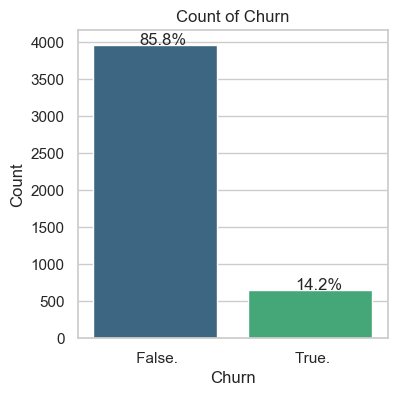

In [28]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot the count of churn
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='Churn', data=tcp, palette='viridis')

# Calculate percentage of each category
total_count = len(tcp['Churn'])
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_count)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + height
    ax.annotate(percentage, (x, y), size=12)

plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Insights:
- The data indicates that approximately 86% of customers exhibit a tendency to remain with the company, which is highly advantageous for the business operations.

In [75]:
# Categorical columns
categorical_columns = ['State', 'Area Code', 'International Plan', 'VMail Plan']

# Numerical columns
numerical_columns = ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
                     'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 
                     'Night Calls', 'Night Charge', 'International Mins', 'International calls',
                     'International Charge', 'CustServ Calls']

### 9.1(a) Categorical Column Analysis

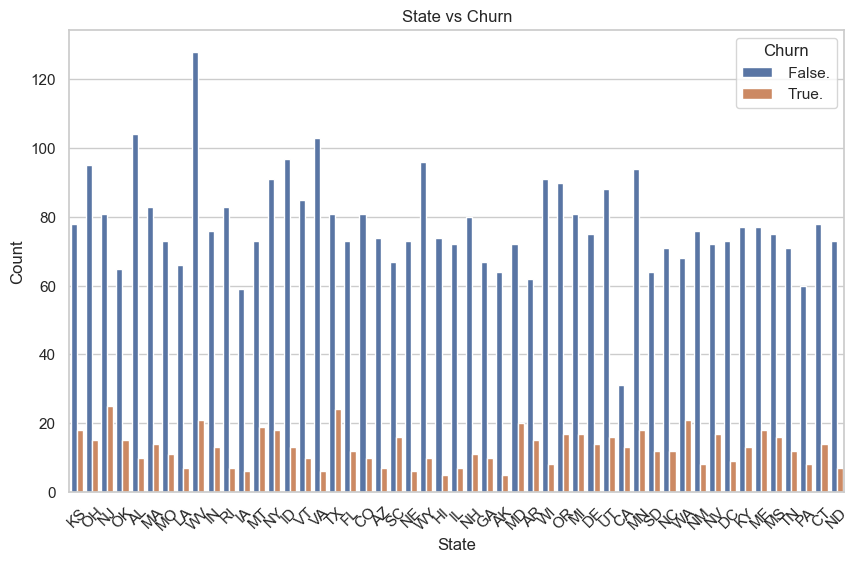

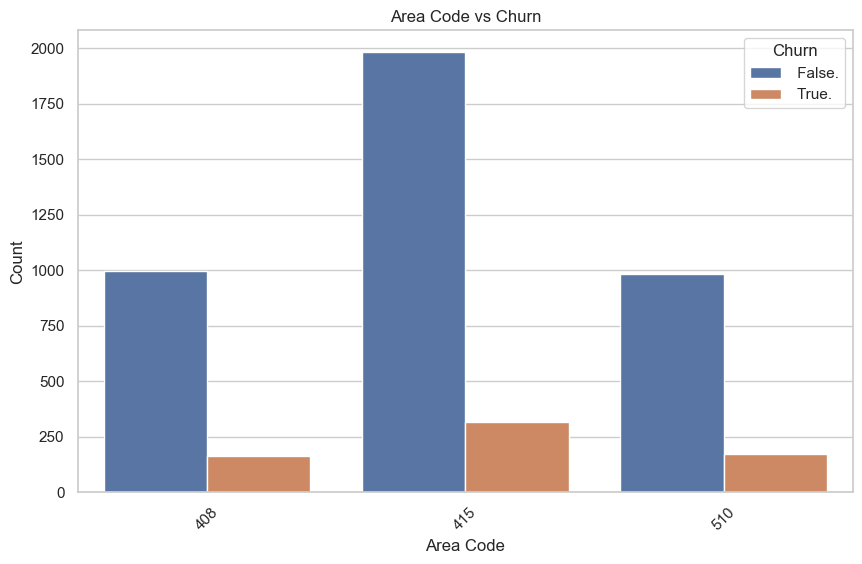

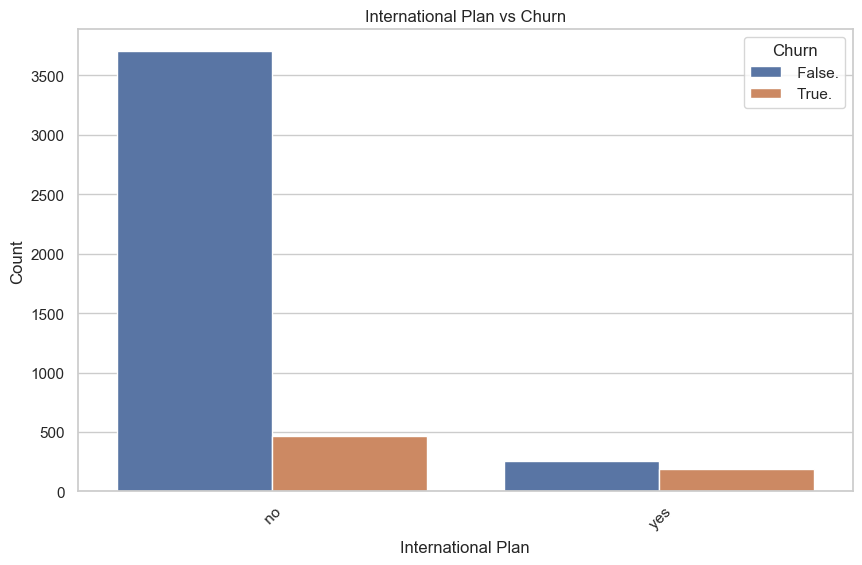

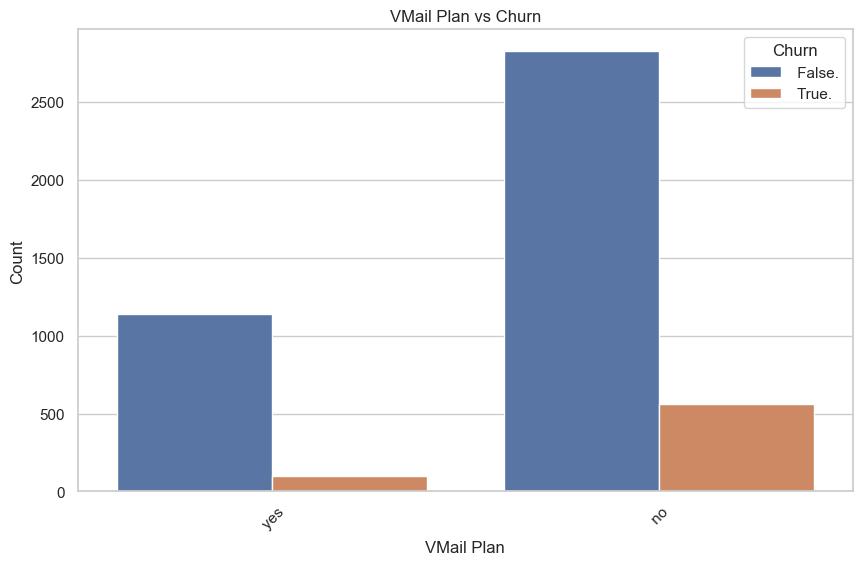

In [29]:
# Bivariate analysis for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Churn', data=tcp)
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### 9.1(b) Numerical Columns to analyse

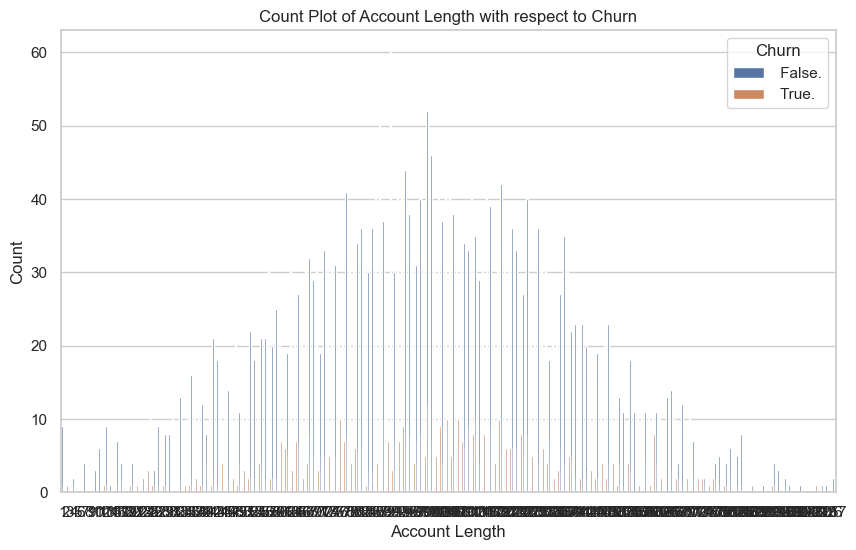

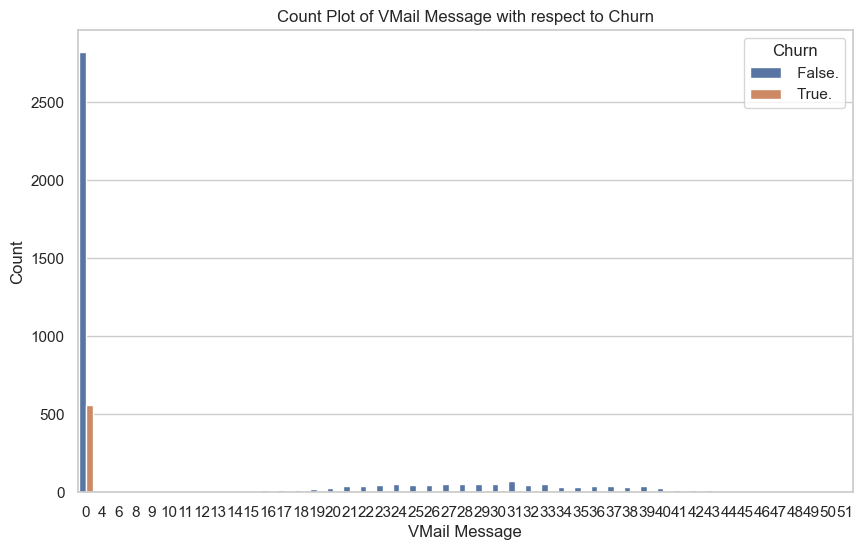

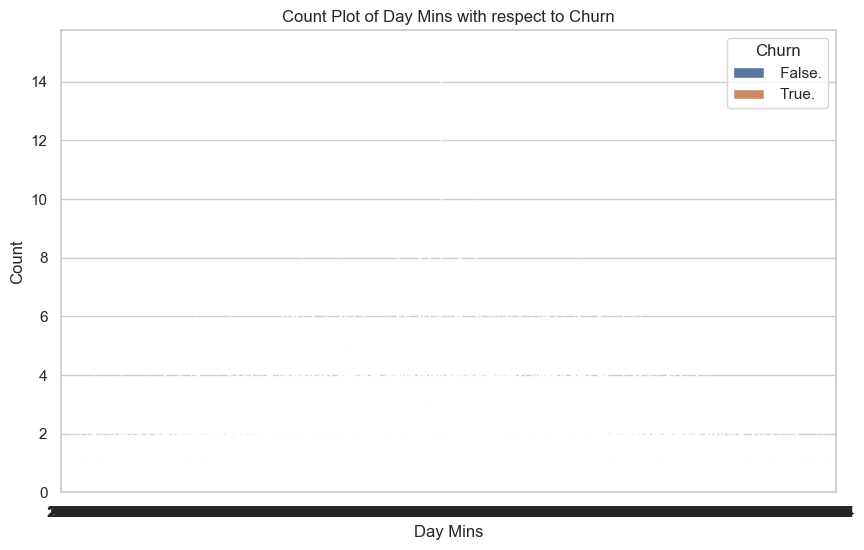

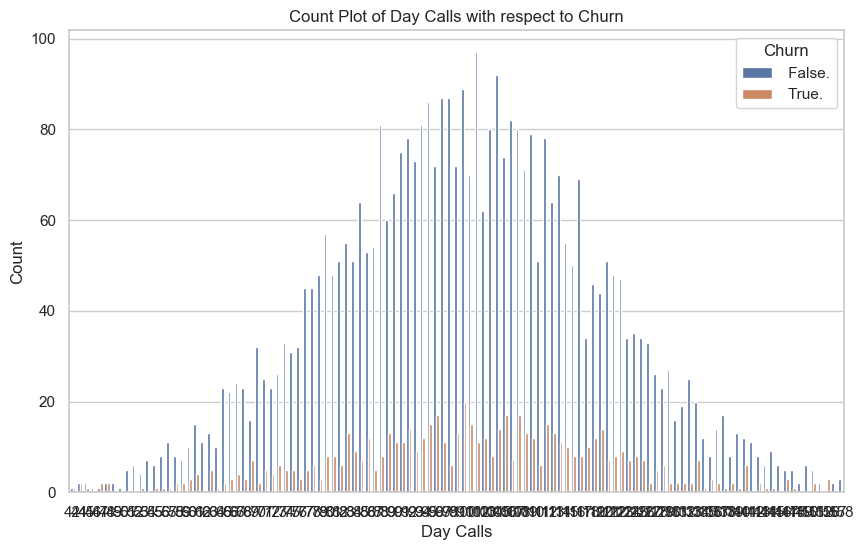

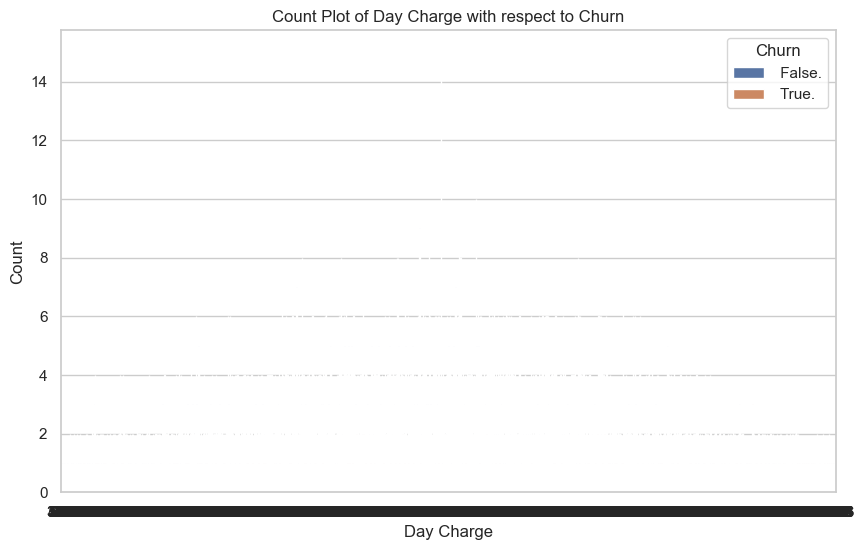

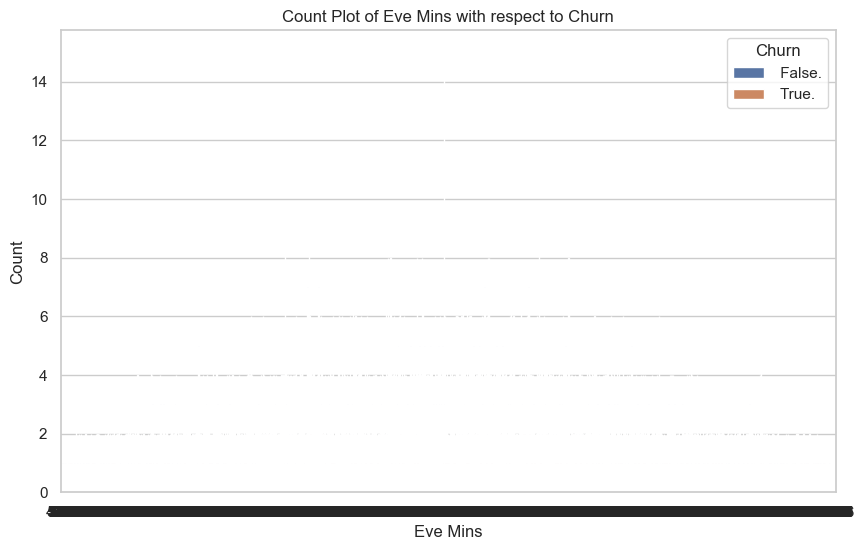

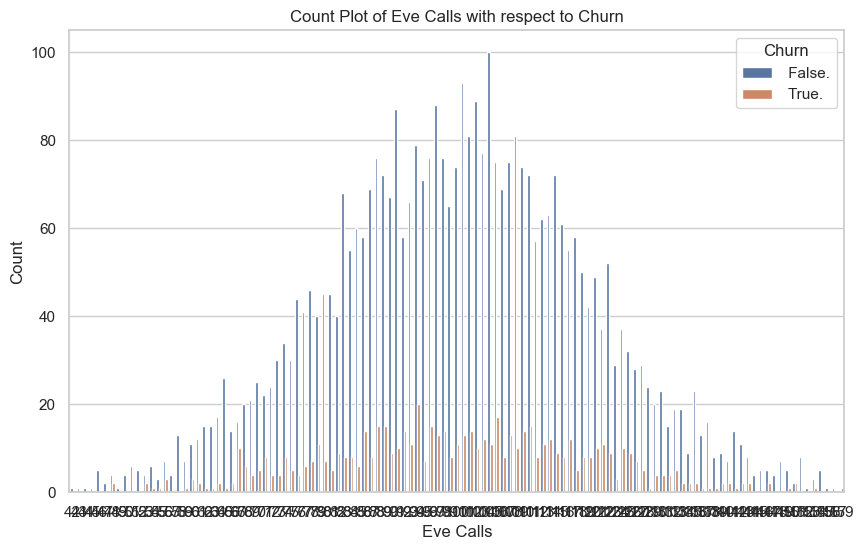

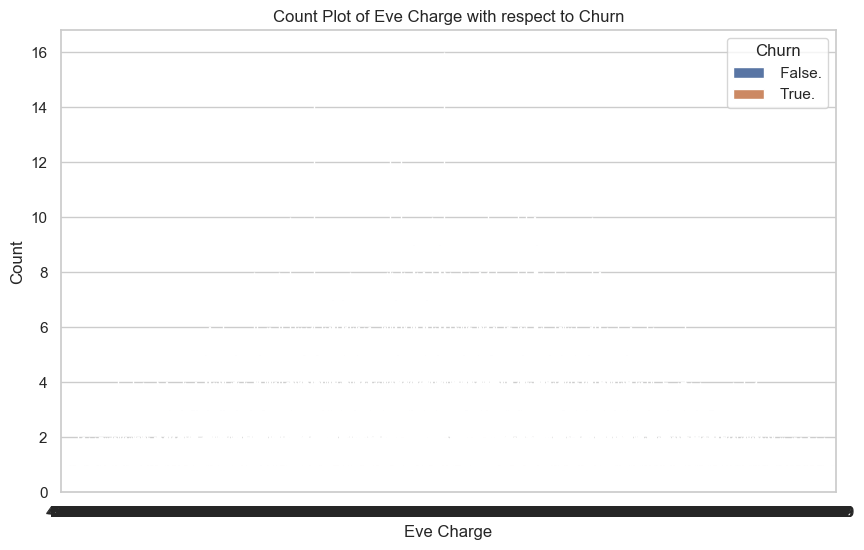

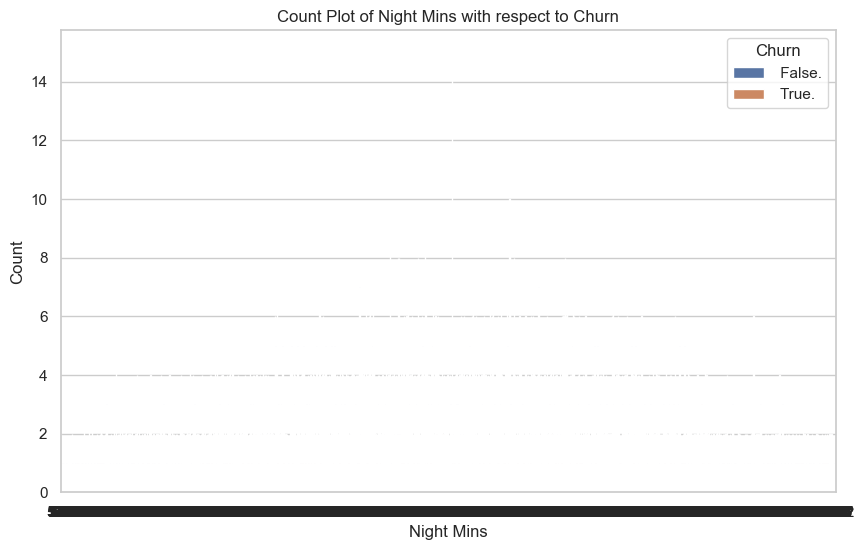

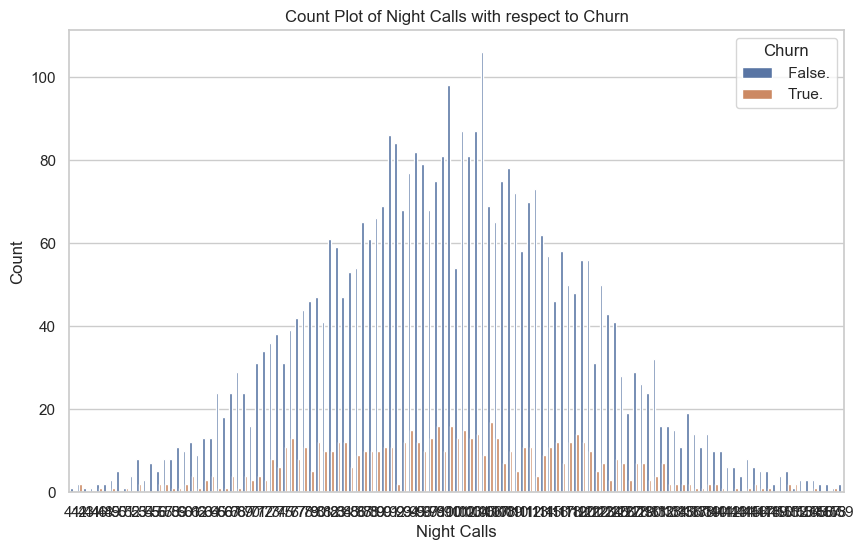

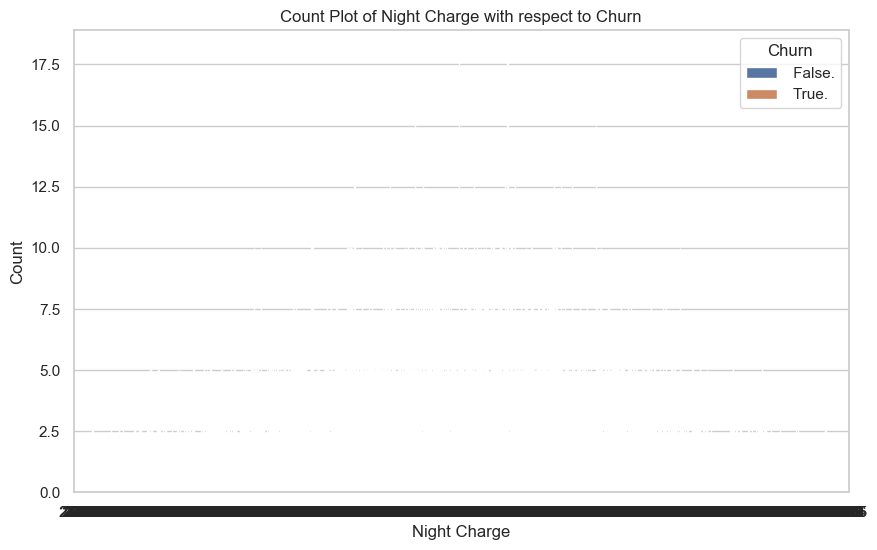

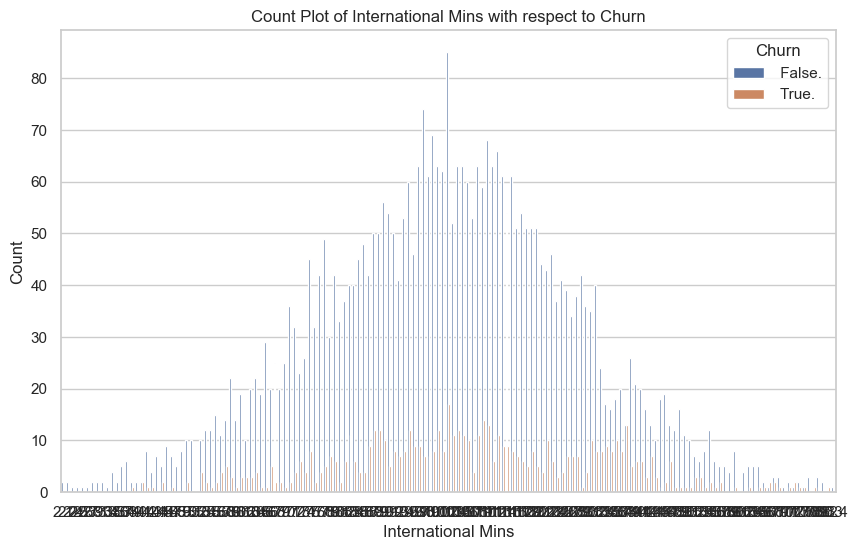

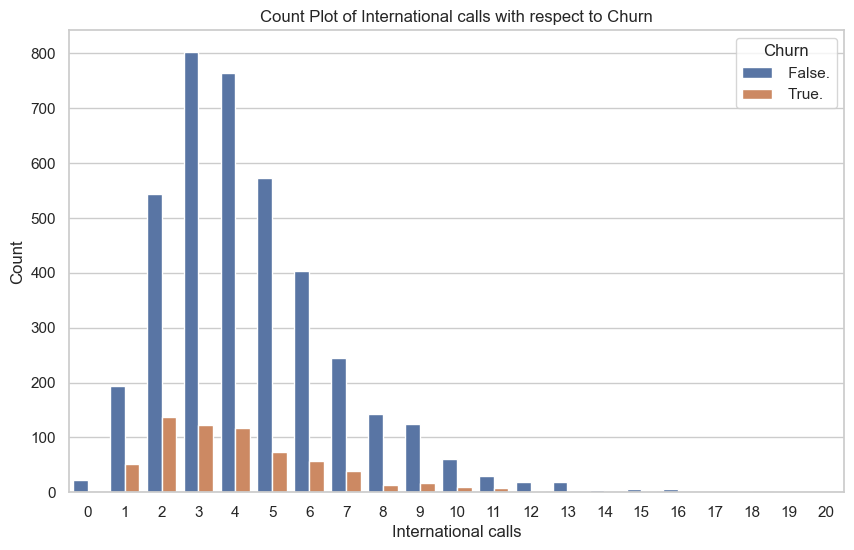

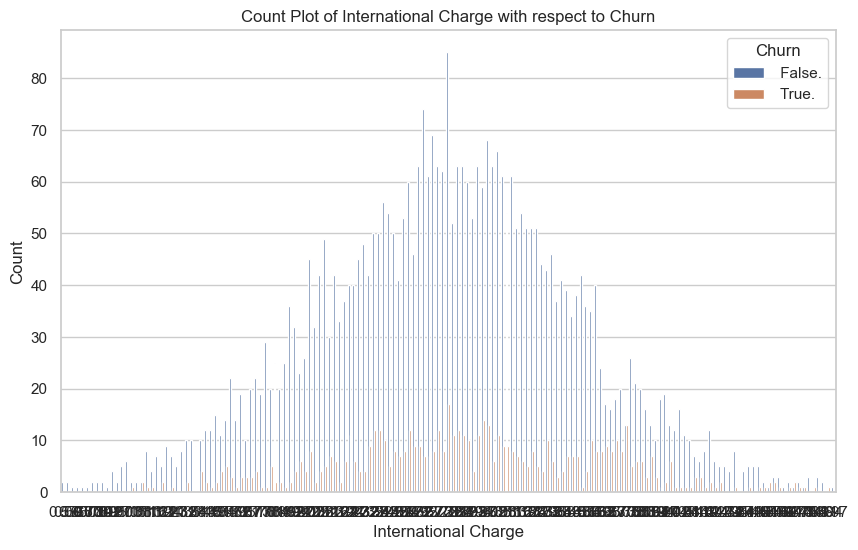

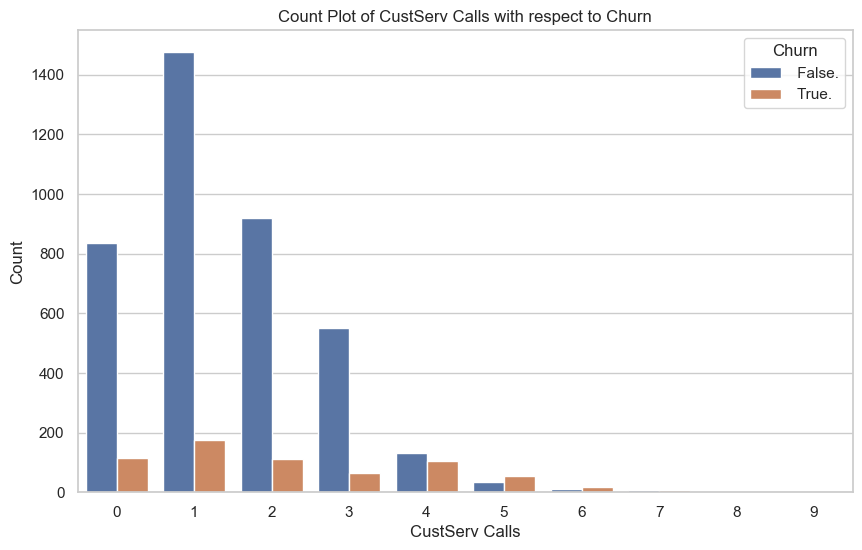

In [30]:
sns.set(style="whitegrid")

# Loop through each numerical column and create count plots
for column in numerical_columns:                          
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Churn', data=tcp)
    plt.title(f'Count Plot of {column} with respect to Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.show()

### 9.2 Multivariate Analysis

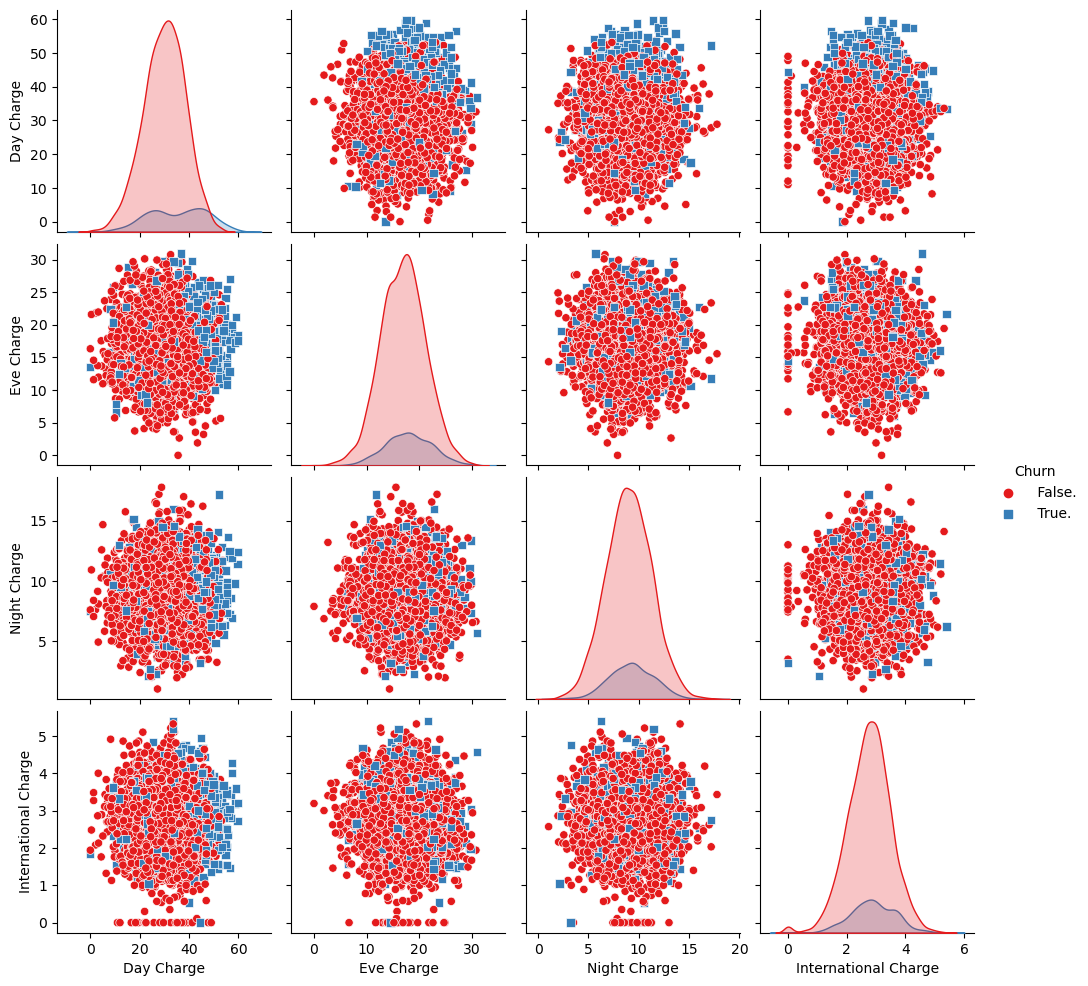

In [29]:
# Select relevant columns for visualization
charges_columns = [
    'Day Charge', 'Eve Charge', 'Night Charge',
    'International Charge', 'Churn'
]
charges_df = tcp[charges_columns]

# Pairplot for scatter plots and histograms
sns.pairplot(charges_df, hue='Churn', markers=['o', 's'], palette='Set1')
plt.show()


Text(0.5, 1.0, 'Correlation Matrix - Numerical Columns')

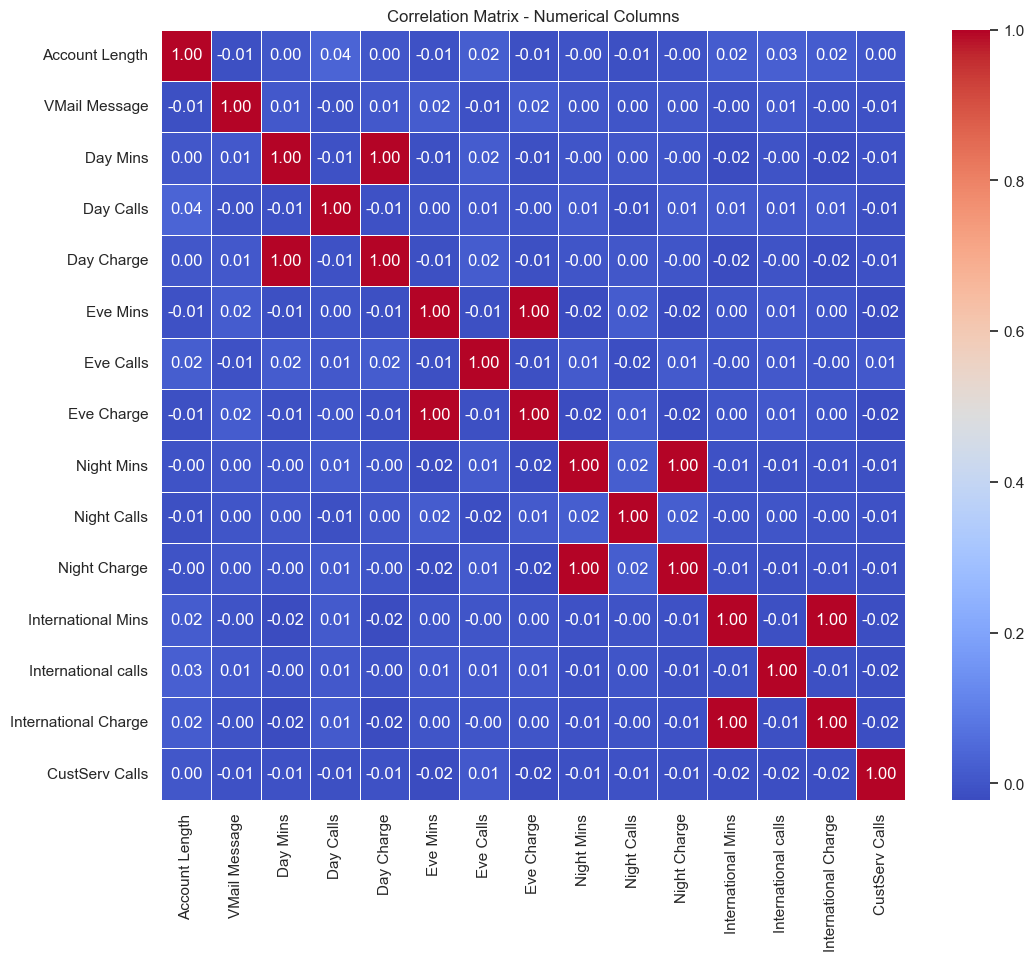

In [31]:
# Create a correlation matrix
correlation_matrix = tcp[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix - Numerical Columns')

### Insights:
#### We can readily identify columns with high correlation, which could lead to multicollinearity issues in our features. To mitigate this concern, we opt to drop these redundant columns.

## 10. Feature Selection

In [76]:
# Drop specific columns
tcp = tcp.drop(columns=['Day Charge', 'Eve Charge','Night Charge', 'International Charge'], axis=1)

In [245]:
tcp.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins',
       'Eve Calls', 'Night Mins', 'Night Calls', 'International Mins',
       'International calls', 'CustServ Calls', 'Churn'],
      dtype='object')

## Feature Extraction

In [153]:
# # Create new features based on feature extraction
# tcp['Total_Minutes'] = tcp['Day Mins'] + tcp['Eve Mins'] + tcp['Night Mins'] + tcp['International Mins']
# tcp['Total_Calls'] = tcp['Day Calls'] + tcp['Eve Calls'] + tcp['Night Calls'] + tcp['International calls']
# tcp['Total_Charges'] = tcp['Day Charge'] + tcp['Eve Charge'] + tcp['Night Charge'] + tcp['International Charge']
# tcp['Total_Communication'] = tcp['VMail Message'] + tcp['Day Mins'] + tcp['Eve Mins'] + tcp['Night Mins'] + tcp['International Mins'] + tcp['Day Calls'] + tcp['Eve Calls'] + tcp['Night Calls'] + tcp['International calls']
# tcp['Total_Usage_with_Plans'] = tcp['Day Mins'] + tcp['Eve Mins'] + tcp['Night Mins'] + tcp['International Mins'] + (tcp['International Plan'] == 'yes') + (tcp['VMail Plan'] == 'yes')

# # Optionally drop the original columns used for feature extraction
# tcp = tcp.drop(['Day Mins', 'Eve Mins', 'Night Mins', 'International Mins', 'Day Calls', 'Eve Calls', 'Night Calls', 'International calls', 'Day Charge', 'Eve Charge', 'Night Charge', 'International Charge', 'VMail Message', 'International Plan', 'VMail Plan'], axis=1)

- As feature extraction is not yielding optimal performance, we have decided to omit this step.

In [103]:
tcp.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins',
       'Eve Calls', 'Night Mins', 'Night Calls', 'International Mins',
       'International calls', 'CustServ Calls', 'Churn'],
      dtype='object')

In [155]:
tcp.shape

(4617, 10)

## 11. Train-Test Split

In [77]:
X = tcp.drop(columns=['Churn'])  # Features
y = tcp['Churn']  # Target variable

# Split the data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Check the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3693, 15)
X_test shape: (924, 15)
y_train shape: (3693,)
y_test shape: (924,)


## 12. Encoding
#### Decision-base for encoding technique:
- International Plan and VMail Plan: These columns contain binary categorical data (yes/no). They are suitable for binary encoding or label encoding where 'yes' is mapped to 1 and 'no' is mapped to 0.
- Churn: This column indicates whether a customer has churned or not. It's a binary categorical variable, suitable for binary encoding or label encoding.
- For binary categorical variables like International Plan, VMail Plan, and Churn, binary encoding or label encoding (mapping 'yes' to 1 and 'no' to 0) would be suitable.
- For State and Phone, label encoding might be more appropriate due to the large number of unique values, especially for states. However, considering whether the ordinal relationship makes sense for our analysis. If not, we may opt for one-hot encoding for State or dropping the Phone column.

### 12.1 One-hot Encoding technique

In [78]:
# Perform one-hot encoding for the 'State' column with drop_first=True for training set
encoded_states_train = pd.get_dummies(X_train['State'], prefix='State', drop_first=True)

# Drop the original 'State' column from the training set
X_train_encoded = X_train.drop('State', axis=1)

# Concatenate the original training set with the encoded 'State' columns
X_train_encoded = pd.concat([X_train_encoded, encoded_states_train], axis=1)

# Perform one-hot encoding for the 'State' column with drop_first=True for testing set
encoded_states_test = pd.get_dummies(X_test['State'], prefix='State', drop_first=True)

# Drop the original 'State' column from the testing set
X_test_encoded = X_test.drop('State', axis=1)

# Concatenate the original testing set with the encoded 'State' columns
X_test_encoded = pd.concat([X_test_encoded, encoded_states_test], axis=1)

# Print the shape of the encoded training set
print("Shape of X_train_encoded:", X_train_encoded.shape)

# Print the shape of the encoded testing set
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (3693, 64)
Shape of X_test_encoded: (924, 64)


### 12.2 Label Encoding

In [79]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'International Plan' column
X_train_encoded['International Plan'] = label_encoder.fit_transform(X_train_encoded['International Plan'])
X_test_encoded['International Plan'] = label_encoder.transform(X_test_encoded['International Plan'])

# Encode 'VMail Plan' column
X_train_encoded['VMail Plan'] = label_encoder.fit_transform(X_train_encoded['VMail Plan'])
X_test_encoded['VMail Plan'] = label_encoder.transform(X_test_encoded['VMail Plan'])

# Encode 'Churn' column
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert y_train and y_test to DataFrame
y_train = pd.DataFrame(y_train, columns=['Churn'])
y_test = pd.DataFrame(y_test, columns=['Churn'])

# Print the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3693, 15)
Shape of X_test: (924, 15)
Shape of y_train: (3693, 1)
Shape of y_test: (924, 1)


In [249]:
X_train_encoded.sample(10)

,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International calls,CustServ Calls,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
1756,118,408,1,1,39,153.8,106,123.3,111,117.8,103,9.2,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1094,115,415,0,0,0,245.2,105,159.0,109,229.9,74,7.2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2862,126,408,0,1,24,58.9,125,305.5,90,158.9,73,12.1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
794,73,408,0,0,0,187.3,118,239.7,90,167.5,108,15.1,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2363,116,415,0,0,0,129.4,84,157.3,89,215.5,77,13.3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4160,99,408,0,0,0,130.4,121,219.9,103,84.1,85,9.8,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2840,108,415,0,1,41,171.6,110,136.1,78,183.4,103,10.8,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4015,57,415,0,0,0,166.4,114,76.8,119,260.1,77,10.9,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
863,45,408,0,0,0,207.6,71,152.7,94,217.8,125,12.4,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
706,108,415,0,0,0,215.6,78,195.3,119,194.4,65,3.6,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
y_train.head()

,Churn
0,1
1,0
2,0
3,0
4,0


## 13. Feature Scaling- Standardization technique
### Standard Scaling

In [80]:
numerical1=['Account Length', 'Area Code','VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins',
       'Eve Calls', 'Night Mins', 'Night Calls', 'International Mins',
       'International calls', 'CustServ Calls',]

In [81]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on X_train_encoded's numerical columns
X_train_scaled = X_train_encoded.copy()
X_train_scaled[numerical1] = scaler.fit_transform(X_train_encoded[numerical1])

# Transform X_test_encoded's numerical columns
X_test_scaled = X_test_encoded.copy()
X_test_scaled[numerical1] = scaler.transform(X_test_encoded[numerical1])

#### After experimenting with various scaling techniques including MinMax, Robust, and Standard scaling, we determined that the Standard scaling technique yields optimal results. Therefore, we have chosen to utilize Standard scaling as our preferred scaling technique.

In [108]:
tcp.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins',
       'Eve Calls', 'Night Mins', 'Night Calls', 'International Mins',
       'International calls', 'CustServ Calls', 'Churn'],
      dtype='object')

In [82]:
X_train_scaled

,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International calls,CustServ Calls,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
2143,-0.537865,-0.526186,0,0,-0.578803,-0.439042,0.451433,-1.548195,-0.680199,-0.225967,0.148436,0.360345,0.225357,1.090885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2453,0.851234,-0.526186,0,1,2.216492,0.622996,-0.349957,0.225638,-2.207081,-0.700624,-1.040874,-0.108091,1.433844,-0.431366,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3041,-1.548119,-0.691132,0,0,-0.578803,-1.613749,-0.850826,-0.014176,0.693995,0.110822,0.197990,-1.369265,-0.177472,-1.192492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2317,0.144056,-0.526186,0,0,-0.578803,0.595291,0.501520,-0.263900,-1.596328,-1.427381,-1.437311,-1.441332,-0.580301,1.090885,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2970,-0.260045,-0.526186,0,1,1.039526,-1.037477,-0.299870,0.622025,-0.527511,0.425947,0.396209,-1.405299,3.045160,-0.431366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0.118800,-0.691132,0,0,-0.578803,-0.608968,0.150912,0.443651,-1.138264,-0.730167,0.098881,0.900849,-0.580301,0.329759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1043,0.598671,-0.526186,0,0,-0.578803,-0.407642,0.200999,0.215728,-1.189160,-0.418981,0.197990,-0.036024,1.433844,1.090885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1378,-1.068249,-0.526186,1,1,2.584294,-0.699472,-0.199697,1.426692,-0.018550,-0.141278,0.247545,-0.504460,-0.177472,-0.431366,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
757,0.295594,-0.526186,0,0,-0.578803,-1.198168,0.401346,0.851930,0.541306,-0.314596,-1.090429,1.008949,0.225357,-0.431366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [34]:
tcp.Churn.value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

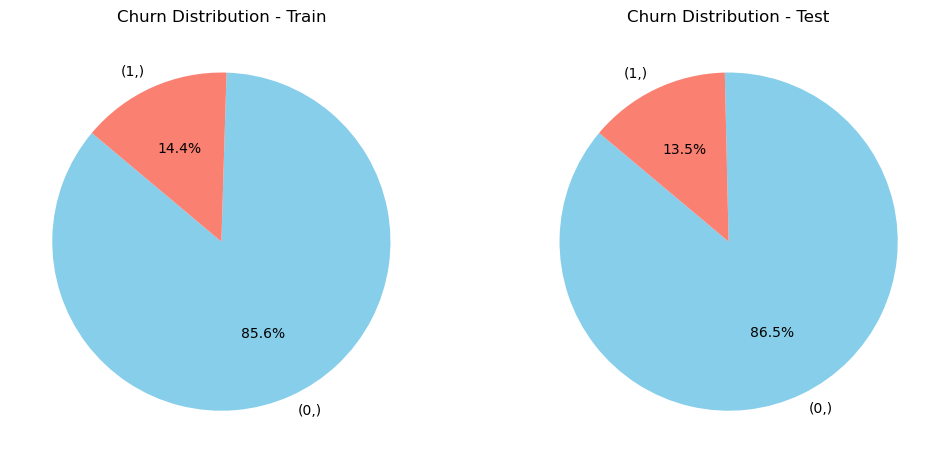

In [120]:
# Create subplots for both train and test datasets
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for y_train
axs[0].pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
axs[0].set_title('Churn Distribution - Train')

# Plot for y_test
axs[1].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
axs[1].set_title('Churn Distribution - Test')

plt.show()

## 14. Data Imbalancing treatment

In [83]:
# Initialize SMOTE
smote = SMOTE(random_state=19)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the shape of resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

Shape of X_train_resampled: (6336, 64)
Shape of y_train_resampled: (6336, 1)


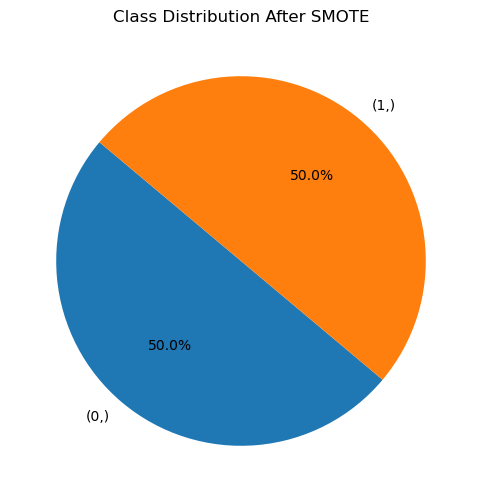

In [70]:
# Count the class distributions after SMOTE
class_counts_after = y_train_resampled.value_counts()

# Plot the class distributions after SMOTE
plt.figure(figsize=(6, 6))
plt.pie(class_counts_after, labels=class_counts_after.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution After SMOTE')
plt.show()

## 15. Building model
- When exploring the possibility of using machine learning for the stated use cases, it's essential to focus on metrics that directly align with the business objectives and the specific problem at hand. In the context of churn prediction and customer retention, the metric of primary interest is typically the F1 score.
- Let's say a churn prediction model achieves high accuracy but has low recall. This means it accurately predicts most non-churned customers but misses a significant portion of customers who actually churn. Consequently, the company may fail to take proactive retention actions for those customers, resulting in lost revenue and decreased customer satisfaction.

- By focusing on the F1 score, you ensure that the machine learning models effectively capture both churned and non-churned customers, leading to more accurate predictions and actionable insights for retention strategies.
#### For our problem statement, where the goal is to develop a predictive churn risk scoring model to quantify the likelihood of customer churn, the key metric to focus on is likely the F1 score or balanced accuracy.

#### Reason:

#### F1 Score: The F1 score balances precision and recall, which is important in the context of churn prediction. It considers both false positives and false negatives, providing a comprehensive measure of the model's performance in identifying churners while minimizing misclassifications.
- Given the competitive telecom market and the importance of accurately identifying customers at risk of churn, optimizing for the F1 score or balanced accuracy would help in building a robust churn prediction model. These metrics ensure that the model effectively identifies potential churners while maintaining a balance between false positives and false negatives.

## 15.1 Logistic Regression

In [84]:
# Create a logistic regression model
logistic_model = LogisticRegression(random_state=19)

# Train the model
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=19)

### 15.1 (a) Evaluation Metrics: Confusion Matrix/ Classification Report/ ROC-AUC Score

In [85]:
# Training accuracy
train_accuracy = logistic_model.score(X_train_resampled, y_train_resampled)

# Testing accuracy
test_accuracy = logistic_model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9065656565656566
Testing Accuracy: 0.8495670995670995


### 15.1 (b) Confusion Matrix

Confusion Matrix:
 [[755  38]
 [101  30]]


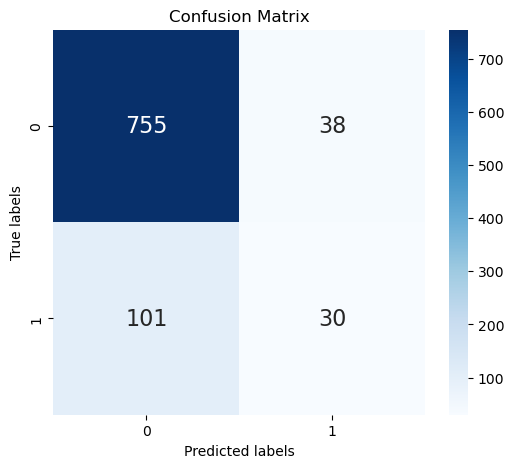

In [86]:
# Predictions on the testing set
y_pred = logistic_model.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 15.1 (c) Classification Report

In [87]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       793
           1       0.44      0.23      0.30       131

    accuracy                           0.85       924
   macro avg       0.66      0.59      0.61       924
weighted avg       0.82      0.85      0.83       924



### 15.1 (d) AUC-ROC Curve

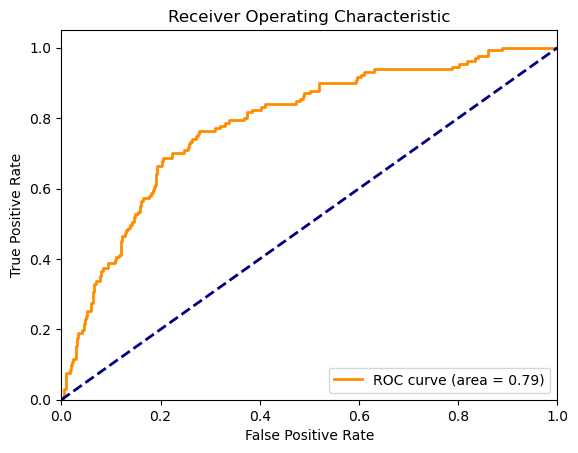

AUC Score: 0.7850466390073448


In [91]:
# Get the predicted probabilities for the positive class
y_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

### 15.2 Performance evaluation by cross validation

In [92]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-Validation Scores: [0.37905237 0.94491854 0.94448669 0.95019157 0.94198473]
Mean CV Score: 0.8321267812606425
Standard Deviation of CV Scores: 0.22655295971097936


### 15.3 Hyperparameter tuning by GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in optimization problem
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=19), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Perform grid search to find the best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8334334939553931


In [93]:
# Instantiate the logistic regression model with the best parameters
logistic_model_tun = LogisticRegression(C=100, penalty='l1', solver='liblinear', random_state=19)

# Train the model with the entire training dataset
logistic_model_tun.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, penalty='l1', random_state=19, solver='liblinear')

### Given that our primary metric of interest is the F1 score, we should prioritize evaluating the F1 scores for both the training and testing datasets.

In [94]:
# Training accuracy
train_accuracy_tun = logistic_model_tun.score(X_train_resampled, y_train_resampled)
print("Training Accuracy (Logistic Regression Tuned):", train_accuracy_tun)

# Testing accuracy
test_accuracy_tun = logistic_model_tun.score(X_test_scaled, y_test)
print("Testing Accuracy (Logistic Regression Tuned):", test_accuracy_tun)

# Predictions on training set
y_train_pred = logistic_model_tun.predict(X_train_resampled)
train_f1_score = f1_score(y_train_resampled, y_train_pred)

# Predictions on testing set
y_test_pred = logistic_model_tun.predict(X_test_scaled)
test_f1_score = f1_score(y_test, y_test_pred)

print(f"Training F1 Score: {train_f1_score:.4f}")
print(f"Testing F1 Score: {test_f1_score:.4f}")

Training Accuracy (Logistic Regression Tuned): 0.9083017676767676
Testing Accuracy (Logistic Regression Tuned): 0.8528138528138528
Training F1 Score: 0.9047
Testing F1 Score: 0.2609


### Cross Validation after hyperparameter tuning

In [95]:
# Perform cross-validation
cv_scores = cross_val_score(logistic_model_tun, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-Validation Scores: [0.35324015 0.95794393 0.95492743 0.95913647 0.95084485]
Mean CV Score: 0.8352185652143648
Standard Deviation of CV Scores: 0.2410062244291249


## 16. KNN Classifier

In [96]:
import random

# Set the random seed
random.seed(19)  # We can use any integer value as the seed

# Create a KNN classifier object
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can specify the number of neighbors (K) here

# Train the KNN classifier
knn_classifier.fit(X_train_resampled, y_train_resampled)


KNeighborsClassifier()

### 16.1 Evaluation Metrics: Confusion Matrix/ Classification Report/ ROC-AUC Score

In [97]:
# Predict on the training set
y_pred_train = knn_classifier.predict(X_train_resampled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Predict on the test set
y_pred_test = knn_classifier.predict(X_test_scaled)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8472222222222222
Testing Accuracy: 0.6504329004329005


### 16.1  (a) Confusion Matrix

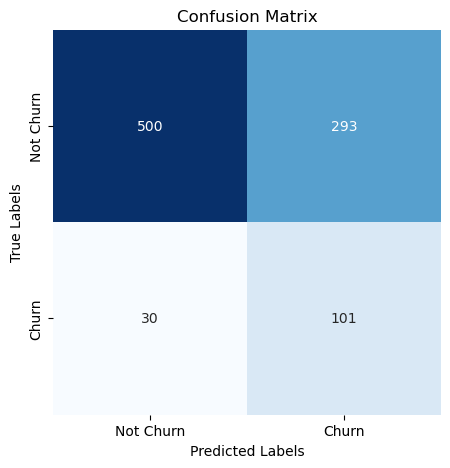

In [98]:
# Calculate confusion matrix for test set
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Visualize confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 16.1 (b) Classification Report

In [99]:
# Print classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score:", accuracy_score(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.63      0.76       793
           1       0.26      0.77      0.38       131

    accuracy                           0.65       924
   macro avg       0.60      0.70      0.57       924
weighted avg       0.85      0.65      0.70       924

Accuracy Score: 0.6504329004329005


### 16.1 (c) AUC-ROC Score

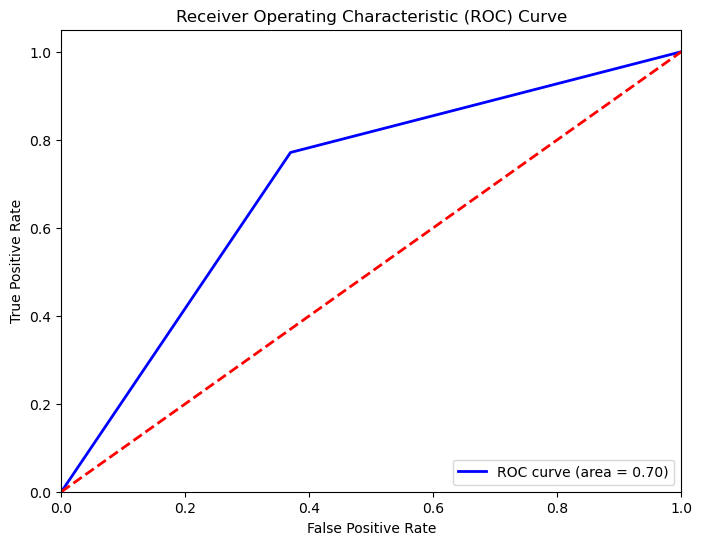

AUC-ROC Score: 0.7007546951859303


In [151]:
# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_test)
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score:", auc_roc_score)

### In terms of f1 score

In [100]:
# Calculate F1 score for training data
y_pred_train = knn_classifier.predict(X_train_resampled)
train_f1_score = f1_score(y_train_resampled, y_pred_train)

# Calculate F1 score for testing data
test_f1_score = f1_score(y_test, y_pred_test)

print("Training F1 Score:", train_f1_score)
print("Testing F1 Score:", test_f1_score)

Training F1 Score: 0.8672517827756445
Testing F1 Score: 0.38476190476190475


### 16.2 Performance evaluation by Cross Validation Score

In [101]:
# Compute cross-validation scores
cv_scores = cross_val_score(knn_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))
print("Standard Deviation of CV F1 Score:", np.std(cv_scores))

Cross-Validation Scores: [0.80412371 0.84077282 0.81971466 0.83103222 0.82154445]
Mean CV F1 Score: 0.823437570610872
Standard Deviation of CV F1 Score: 0.012236491244026456


### 16.3 Hyperparameter tuning by GridSearchCV

In [56]:
# Define the hyperparameters and their values to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Create the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation F1 score found
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best Cross-Validation F1 Score: 0.8557462133185929


In [102]:
# Instantiate the KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance')

# Train the model
best_knn_classifier.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [103]:
# Calculate F1 score for training data
y_pred_train = best_knn_classifier.predict(X_train_resampled)
train_f1_score = f1_score(y_train_resampled, y_pred_train)

# Calculate F1 score for testing data
y_pred_test = best_knn_classifier.predict(X_test_scaled)
test_f1_score = f1_score(y_test, y_pred_test)

print("Training F1 Score:", train_f1_score)
print("Testing F1 Score:", test_f1_score)

Training F1 Score: 1.0
Testing F1 Score: 0.3801980198019802


### Performance evaluation after  tuning

In [105]:
f1_scorer = make_scorer(f1_score)

# Compute cross-validation scores with standard deviation
cv_scores = cross_val_score(best_knn_classifier, X_train_resampled, y_train_resampled, cv=5, scoring=f1_scorer)

# Print the cross-validation scores along with the standard deviation
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation F1 Scores: [0.82007823 0.85520974 0.82907662 0.84852547 0.8384106 ]
Mean F1 Score: 0.8382601311548463
Standard Deviation: 0.012709112071494893


## 17. SVC(Support Vector Classifier) 

In [106]:
# Create SVC model
svc_classifier = SVC(kernel='poly', random_state=19)

# Train SVC model
svc_classifier.fit(X_train_resampled, y_train_resampled)

SVC(kernel='poly', random_state=19)

- After conducting several experiments, we have observed that the polynomial kernel consistently outperforms other kernels. Therefore, we have decided to proceed with the parameters associated with this kernel

### 17.1 Evaluation Metrics: Confusion Matrix/ Classification Report/ ROC-AUC Score

In [107]:
# Predict on training and testing data
y_pred_train_svc = svc_classifier.predict(X_train_resampled)
y_pred_test_svc = svc_classifier.predict(X_test_scaled)

# Calculate training and testing accuracy
train_accuracy_svc = accuracy_score(y_train_resampled, y_pred_train_svc)
test_accuracy_svc = accuracy_score(y_test, y_pred_test_svc)

print("Training Accuracy (SVC):", train_accuracy_svc)
print("Testing Accuracy (SVC):", test_accuracy_svc)

Training Accuracy (SVC): 0.9223484848484849
Testing Accuracy (SVC): 0.8971861471861472


### 17.1 (a) Confusion Matrix

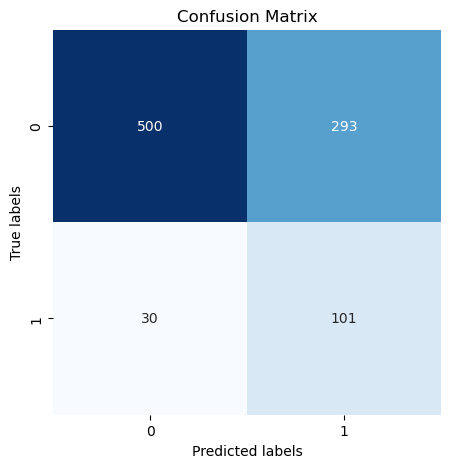

In [108]:
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay
# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 17.1(b) Classification Report

In [109]:
# Generate classification report
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       793
           1       0.63      0.65      0.64       131

    accuracy                           0.90       924
   macro avg       0.79      0.79      0.79       924
weighted avg       0.90      0.90      0.90       924



### 17.1(c) ROC-AUC Score

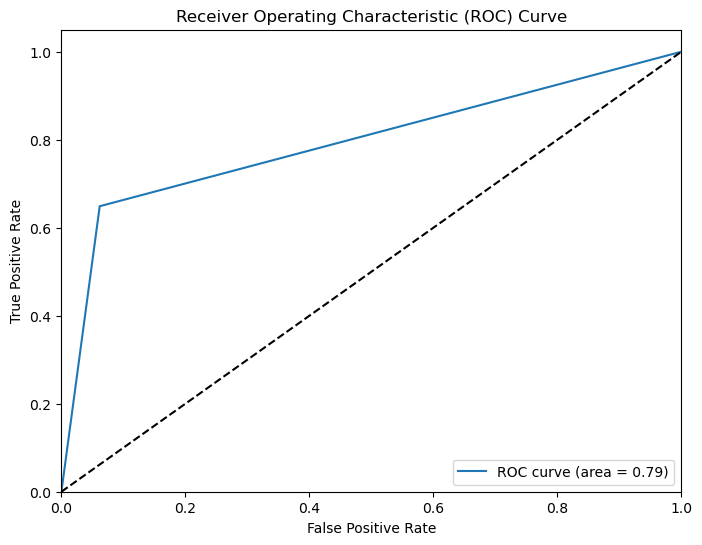

In [110]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_svc)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



### In terms of F1 Score

In [111]:
# Calculate F1 score for training data
train_f1_score_svc = f1_score(y_train_resampled, y_pred_train_svc)

# Calculate F1 score for testing data
test_f1_score_svc = f1_score(y_test, y_pred_test_svc)

print("Training F1 Score (SVC):", train_f1_score_svc)
print("Testing F1 Score (SVC):", test_f1_score_svc)

Training F1 Score (SVC): 0.9188921859545004
Testing F1 Score (SVC): 0.6415094339622642


### 17.2 Performance Evaluation by Cross Validation 

In [112]:
f1_scorer = make_scorer(f1_score)

# Compute cross-validation scores with standard deviation
cv_scores = cross_val_score(svc_classifier, X_train_resampled, y_train_resampled, cv=5, scoring=f1_scorer)

# Print the cross-validation scores along with the standard deviation
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation F1 Scores: [0.86046512 0.88942308 0.87868852 0.87876322 0.8944    ]
Mean F1 Score: 0.880347987984825
Standard Deviation: 0.011665420436027238


### 17.3 Hyperparameter tuning by GridSearchCV

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create the GridSearchCV object
grid_search_svc = GridSearchCV(SVC(random_state=19), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_svc.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print("Best Parameters:", best_params_svc)
print("Best Cross-Validation F1 Score:", best_score_svc)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation F1 Score: 0.9281481687448577


### After Hyper parameter tuning

In [115]:
# Instantiate the SVC model with best parameters
best_svc_model = SVC(kernel=best_params_svc['kernel'], C=best_params_svc['C'], gamma=best_params_svc['gamma'], random_state=19)

# Train the model
best_svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test_svc_best = best_svc_model.predict(X_test_scaled)

### Evaluation after tuning the hyperparameters

In [116]:
# Calculate F1 score for training data
train_f1_score_svc_best = f1_score(y_train_resampled, best_svc_model.predict(X_train_resampled))

# Calculate F1 score for testing data
test_f1_score_svc_best = f1_score(y_test, y_pred_test_svc_best)

print("Training F1 Score (SVC):", train_f1_score_svc_best)
print("Testing F1 Score (SVC):", test_f1_score_svc_best)

Training F1 Score (SVC): 0.9976322020520917
Testing F1 Score (SVC): 0.5981308411214954


### Cross Validation after Hyperparameter tuning

In [117]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_svc = cross_val_score(best_svc_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Scores (SVC):", cv_scores_svc)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score_svc = cv_scores_svc.mean()
std_cv_score_svc = cv_scores_svc.std()

print("Mean CV Score (SVC):", mean_cv_score_svc)
print("Standard Deviation CV Score (SVC):", std_cv_score_svc)

Cross-Validation Scores (SVC): [0.74612403 0.97376543 0.97081413 0.98066512 0.96937213]
Mean CV Score (SVC): 0.9281481687448577
Standard Deviation CV Score (SVC): 0.09109506121582085


## 18. Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=19)

# Train the Random Forest classifier
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=19)

### 18.1 Evaluation Metrics: Confusion Matrix/ Classification Report/ ROC-AUC Score

In [119]:
# Predict on training and testing data
y_pred_train_rf = rf_classifier.predict(X_train_resampled)
y_pred_test_rf = rf_classifier.predict(X_test_scaled)

# Calculate training and testing accuracy
train_accuracy_rf = accuracy_score(y_train_resampled, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

print("Training Accuracy (Random Forest):", train_accuracy_rf)
print("Testing Accuracy (Random Forest):", test_accuracy_rf)

# Calculate training and testing F1 scores
train_f1_rf = f1_score(y_train_resampled, y_pred_train_rf)
test_f1_rf = f1_score(y_test, y_pred_test_rf)

print("Training F1 Score (Random Forest):", train_f1_rf)
print("Testing F1 Score (Random Forest):", test_f1_rf)

Training Accuracy (Random Forest): 1.0
Testing Accuracy (Random Forest): 0.9177489177489178
Training F1 Score (Random Forest): 1.0
Testing F1 Score (Random Forest): 0.7007874015748031


### 18.1 (a) Confusion Matrix

[[759  34]
 [ 42  89]]


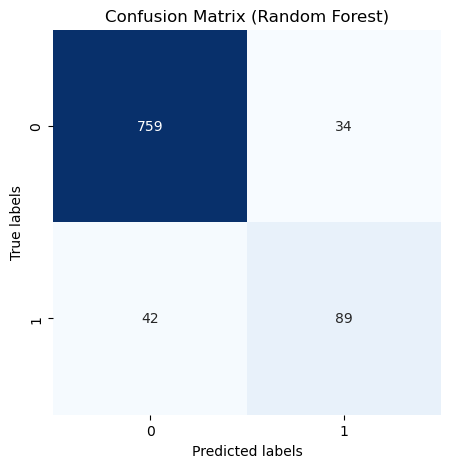

In [120]:
# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)
print(confusion_matrix(y_test, y_pred_test_rf))
# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

### 18.1 (b) Classification Report

In [121]:
# Generate classification report and confusion matrix
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_test_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       793
           1       0.72      0.68      0.70       131

    accuracy                           0.92       924
   macro avg       0.84      0.82      0.83       924
weighted avg       0.92      0.92      0.92       924



### 18.1 (c) AUC-ROC

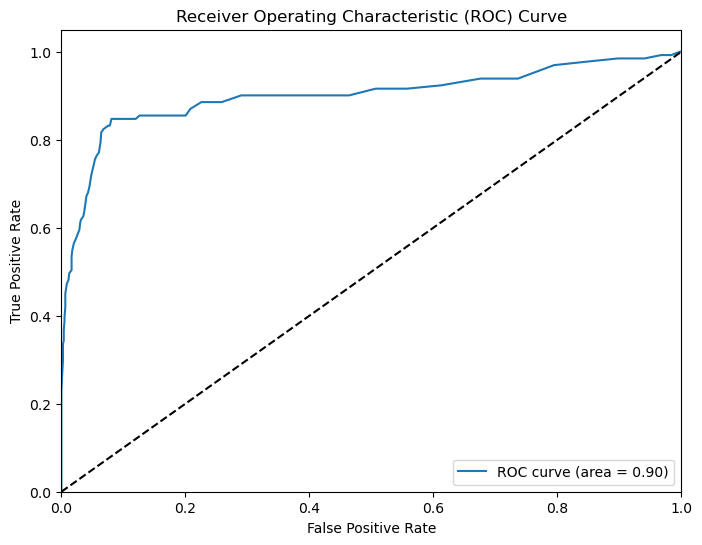

In [122]:
# Predict probabilities for the positive class (class 1)
y_pred_proba_rf = rf_classifier.predict_proba(X_test_scaled)

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])

# Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 18.2 Performance evaluation by Cross Validation

In [123]:
# Perform cross-validation
cv_scores_rf = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score_rf = np.mean(cv_scores_rf)
std_cv_score_rf = np.std(cv_scores_rf)

# Print the mean and standard deviation
print("Mean Cross-Validation Score (Random Forest):", mean_cv_score_rf)
print("Standard Deviation of Cross-Validation Score (Random Forest):", std_cv_score_rf)

Cross-Validation Scores (Random Forest): [0.91289782 0.96632733 0.95693031 0.95981087 0.965625  ]
Mean Cross-Validation Score (Random Forest): 0.9523182664464555
Standard Deviation of Cross-Validation Score (Random Forest): 0.020023508671519235


### 18.3 Hyperparameter Tuning by GridSearchCV

In [74]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best F1 Score:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9488095793495287


In [124]:
# Instantiate Random Forest with best parameters
best_rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=19)

# Train the model on the resampled training data
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=19)

In [126]:
# Predict on training and testing data
y_pred_train_rf = best_rf_classifier.predict(X_train_resampled)
y_pred_test_rf = best_rf_classifier.predict(X_test_scaled)

# Calculate F1 score for training and testing data
train_f1_score_rf = f1_score(y_train_resampled, y_pred_train_rf)
test_f1_score_rf = f1_score(y_test, y_pred_test_rf)

print("Training F1 Score (Random Forest):", train_f1_score_rf)
print("Testing F1 Score (Random Forest):", test_f1_score_rf)

Training F1 Score (Random Forest): 1.0
Testing F1 Score (Random Forest): 0.7007874015748031


### Cross Validation after hypertuning

In [177]:
# Perform cross-validation
cv_scores_rf = cross_val_score(best_rf_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean CV Score (Random Forest):", cv_scores_rf.mean())
print("Standard Deviation of CV Scores (Random Forest):", cv_scores_rf.std())

Cross-Validation Scores (Random Forest): [0.91289782 0.96632733 0.95693031 0.95981087 0.965625  ]
Mean CV Score (Random Forest): 0.9523182664464555
Standard Deviation of CV Scores (Random Forest): 0.020023508671519235


## 19. GB (Gradient Boosting Classifier)

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create Gradient Boosting model
gb_classifier = GradientBoostingClassifier(random_state=19)

# Train the model
gb_classifier.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=19)

### 19.1 Evaluation Metrics: Confusion Matrix/ Classification Report/ ROC-AUC Score

In [128]:
# Predict on training and testing data
y_pred_train_gb = gb_classifier.predict(X_train_resampled)
y_pred_test_gb = gb_classifier.predict(X_test_scaled)

# Calculate training and testing accuracy
train_accuracy_gb = accuracy_score(y_train_resampled, y_pred_train_gb)
test_accuracy_gb = accuracy_score(y_test, y_pred_test_gb)

print("Training Accuracy (Gradient Boosting):", train_accuracy_gb)
print("Testing Accuracy (Gradient Boosting):", test_accuracy_gb)

# Calculate training and testing F1 scores
train_f1_gb = f1_score(y_train_resampled, y_pred_train_gb)
test_f1_gb = f1_score(y_test, y_pred_test_gb)

print("Training F1 Score (Random Forest):", train_f1_gb)
print("Testing F1 Score (Random Forest):", test_f1_gb)

Training Accuracy (Gradient Boosting): 0.9395517676767676
Testing Accuracy (Gradient Boosting): 0.9285714285714286
Training F1 Score (Random Forest): 0.9380759902991107
Testing F1 Score (Random Forest): 0.7480916030534351


### 19.1 (a) Confusion Matrix

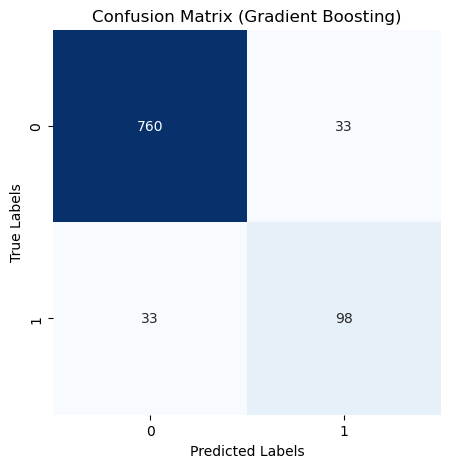

In [181]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 19.1 (b) Classification Report

In [129]:
# Generate predictions for the testing data
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Classification Report
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       793
           1       0.75      0.75      0.75       131

    accuracy                           0.93       924
   macro avg       0.85      0.85      0.85       924
weighted avg       0.93      0.93      0.93       924



### 19.1 (c) AUC-ROC Score

ROC-AUC Score (Gradient Boosting): 0.91583801006902


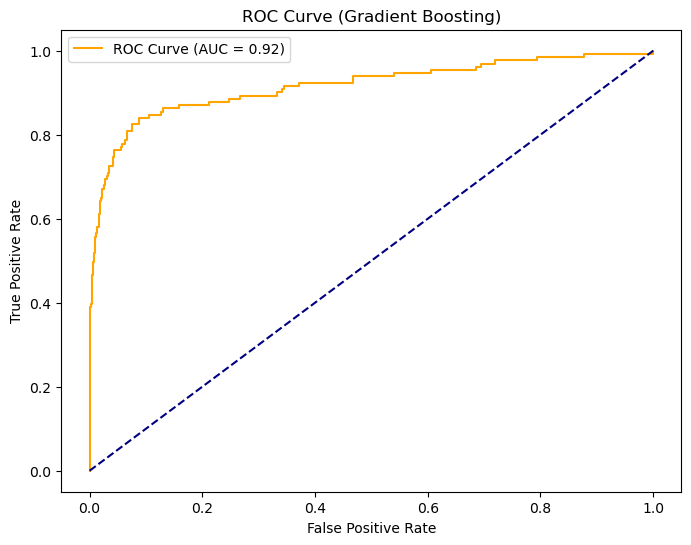

In [130]:
y_pred_proba_gb = gb_classifier.predict_proba(X_test_scaled)[:, 1]
# ROC-AUC Score
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print("ROC-AUC Score (Gradient Boosting):", roc_auc_gb)

# ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='orange', label=f'ROC Curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting)')
plt.legend()
plt.show()

### 19.2 Performance evaluation by Cross Validation

In [131]:
# Perform cross-validation
cv_scores_gb = cross_val_score(gb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print cross-validation scores
print("Cross-Validation Scores (F1) for Gradient Boosting:")
print(cv_scores_gb)

# Calculate mean and standard deviation
mean_cv_score_gb = cv_scores_gb.mean()
std_cv_score_gb = cv_scores_gb.std()

print("Mean Cross-Validation Score (F1) for Gradient Boosting:", mean_cv_score_gb)
print("Standard Deviation of Cross-Validation Score (F1) for Gradient Boosting:", std_cv_score_gb)

Cross-Validation Scores (F1) for Gradient Boosting:
[0.82666667 0.95283773 0.92455859 0.92725819 0.94192522]
Mean Cross-Validation Score (F1) for Gradient Boosting: 0.9146492792365708
Standard Deviation of Cross-Validation Score (F1) for Gradient Boosting: 0.04516736400848456


### 19.3 Hyperparameter tuning by GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=19), param_grid_gb, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best F1 score
print("Best Parameters:", grid_search_gb.best_params_)
print("Best Cross-Validation F1 Score:", grid_search_gb.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best Cross-Validation F1 Score: 0.9348854100382363


In [132]:
# Instantiate the Gradient Boosting model with updated parameters
best_params_gb = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5
}

gb_model_tuned = GradientBoostingClassifier(**best_params_gb, random_state=19)

# Fit the model to the training data
gb_model_tuned.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(max_depth=5, random_state=19)

In [133]:
# Predictions on training data
y_train_pred_gb = gb_model_tuned.predict(X_train_resampled)
train_f1_gb = f1_score(y_train_resampled, y_train_pred_gb)

# Predictions on testing data
y_test_pred_gb = gb_model_tuned.predict(X_test_scaled)
test_f1_gb = f1_score(y_test, y_test_pred_gb)

print("Training F1 Score (Gradient Boosting):", train_f1_gb)
print("Testing F1 Score (Gradient Boosting):", test_f1_gb)

Training F1 Score (Gradient Boosting): 0.9795003203074952
Testing F1 Score (Gradient Boosting): 0.7906976744186045


In [134]:
# Perform cross-validation
cv_scores_gb = cross_val_score(gb_model_tuned, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print cross-validation scores
print("Cross-validation F1 scores (Gradient Boosting):", cv_scores_gb)

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score_gb = cv_scores_gb.mean()
std_cv_score_gb = cv_scores_gb.std()

print("Mean Cross-validation F1 Score (Gradient Boosting):", mean_cv_score_gb)
print("Standard Deviation of Cross-validation F1 Score (Gradient Boosting):", std_cv_score_gb)

Cross-validation F1 scores (Gradient Boosting): [0.86865149 0.9633758  0.96319499 0.9556962  0.96325254]
Mean Cross-validation F1 Score (Gradient Boosting): 0.942834203325573
Standard Deviation of Cross-validation F1 Score (Gradient Boosting): 0.037207346856082395


## 20. XGBOOST

In [135]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Create XGBoost model
xgb_model = xgb.XGBClassifier()

# Train XGBoost model
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 20.1 Evaluation Metrics: Confusion Matrix/ Classification Report/ ROC-AUC Score

In [136]:
# Predict on training and testing data
y_pred_train_xgb = xgb_model.predict(X_train_resampled)
y_pred_test_xgb = xgb_model.predict(X_test_scaled)

# Calculate training and testing accuracy
train_accuracy_xgb = accuracy_score(y_train_resampled, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

print("Training Accuracy (XGBoost):", train_accuracy_xgb)
print("Testing Accuracy (XGBoost):", test_accuracy_xgb)

# Calculate training and testing F1 scores
train_f1_xgb = f1_score(y_train_resampled, y_pred_train_xgb, average='weighted')
test_f1_xgb = f1_score(y_test, y_pred_test_xgb, average='weighted')

print("Training F1 Score (XGBoost):", train_f1_xgb)
print("Testing F1 Score (XGBoost):", test_f1_xgb)

Training Accuracy (XGBoost): 0.9987373737373737
Testing Accuracy (XGBoost): 0.9545454545454546
Training F1 Score (XGBoost): 0.9987373717244601
Testing F1 Score (XGBoost): 0.9536252133348503


### 20.1 (a) Confusion Matrix

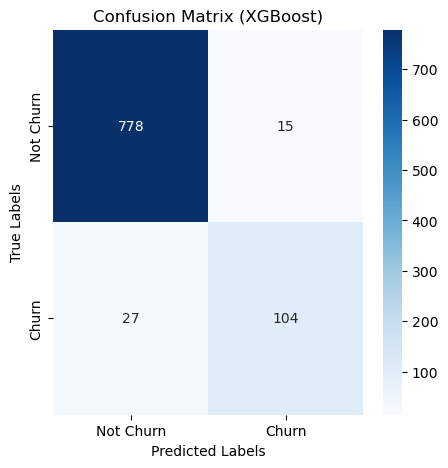

In [137]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 20.1 (b) Classification Report

In [138]:
# Classification Report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_test_xgb))


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       793
           1       0.87      0.79      0.83       131

    accuracy                           0.95       924
   macro avg       0.92      0.89      0.90       924
weighted avg       0.95      0.95      0.95       924



### 20.1 (c) AUC-ROC

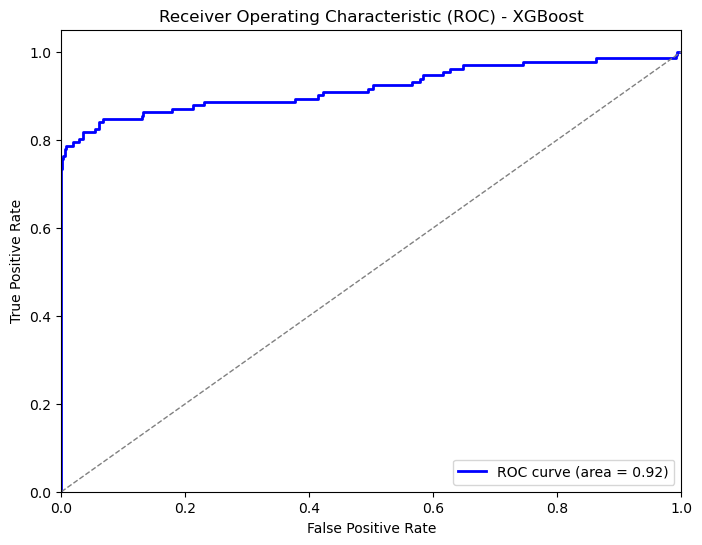

In [139]:
# Predict probabilities on the test set using the XGBoost model
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import roc_auc_score
# Calculate ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
# Compute ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc="lower right")
plt.show()

### 20.2 Performance evaluation by CV

In [140]:
# Create an XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)

# Compute cross-validation scores
cv_scores = cross_val_score(xgb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation F1 Scores (XGBoost):", cv_scores)
print("Mean CV F1 Score (XGBoost):", cv_scores.mean())
print("Standard Deviation CV F1 Score (XGBoost):", cv_scores.std())

Cross-Validation F1 Scores (XGBoost): [0.85992908 0.96089385 0.95714286 0.96661367 0.96284585]
Mean CV F1 Score (XGBoost): 0.9414850624408084
Standard Deviation CV F1 Score (XGBoost): 0.040892484956498894


### 20.3 Hyperparameter tuning

In [217]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Best Cross-Validation F1 Score: 0.9411665670472658


In [141]:
# Instantiate XGBoost classifier with tuned parameters
xgb_classifier_tuned = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=100)

# Train the model
xgb_classifier_tuned.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [143]:
# Predict on training and testing data
y_pred_train_xgb = xgb_classifier_tuned.predict(X_train_resampled)
y_pred_test_xgb = xgb_classifier_tuned.predict(X_test_scaled)

# Calculate training and testing F1 scores
train_f1_score_xgb = f1_score(y_train_resampled, y_pred_train_xgb)
test_f1_score_xgb = f1_score(y_test, y_pred_test_xgb)

print("Training F1 Score (XGBoost):", train_f1_score_xgb)
print("Testing F1 Score (XGBoost):", test_f1_score_xgb)

Training F1 Score (XGBoost): 0.9877094972067039
Testing F1 Score (XGBoost): 0.8178137651821863


In [144]:
# Perform cross-validation with the tuned XGBoost model
cv_scores_xgb = cross_val_score(xgb_classifier_tuned, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation F1 Scores (XGBoost):", cv_scores_xgb)
print("Mean CV F1 Score (XGBoost):", cv_scores_xgb.mean())
print("Standard Deviation of CV F1 Scores (XGBoost):", cv_scores_xgb.std())

Cross-Validation F1 Scores (XGBoost): [0.88927336 0.97233202 0.96062992 0.97952756 0.97729052]
Mean CV F1 Score (XGBoost): 0.955810675438762
Standard Deviation of CV F1 Scores (XGBoost): 0.033903596074708615


## 21. Metrics Comparison

In [57]:
# Data for the table
data = {
    'Model': ['Logistic Regression Before Tuning', 'Logistic Regression After Tuning',
              'KNN Before Tuning', 'KNN After Tuning',
              'SVC Before Tuning', 'SVC After Tuning',
              'RF Before Tuning', 'RF After Tuning',
              'GB Before Tuning', 'GB After Tuning',
              'XGBoost Before Tuning', 'XGBoost After Tuning'],
    
    'Training Accuracy': [90.65, 90.83, 84.72, 100, 92.23, 99.76, 100, 100, 93.95, 97.95, 99.87, 98.77],
    
    'Testing Accuracy': [84.95, 83.28, 65.04, 100, 89.71, 59.80, 91.77, 91.77, 92.85, 92.85, 95.45, 95.45],
    
    'Training F1': [90.53, 90.47, 86.72, 100, 91.88, 99.76, 100, 100, 93.80, 97.95, 99.87, 98.77],
    
    'Testing F1': [30.00, 26.09, 38.47, 38.01, 64.15, 59.80, 70.07, 70.07, 74.80, 79.06, 95.36, 81.78],
    
    'ROC-AUC': [79.00, None, 70.00, None, 79.00, None, 90.00, None, 92.00, None, 92.00, None],
    
    'CV Score': [83.21, 83.52, 82.34, 83.82, 88.03, 92.81, 95.23, 95.23, 91.46, 94.28, 94.14, 95.58]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

# Styling the dataframe for better visualization
styled_df = df.style\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
    .set_caption('Metrics Comparison - Weighted Avg.(Recall)')\

# Display the styled dataframe
styled_df

,Model,Training Accuracy,Testing Accuracy,Training F1,Testing F1,ROC-AUC,CV Score
0,Logistic Regression Before Tuning,90.650000,84.950000,90.530000,30.000000,79.000000,83.210000
1,Logistic Regression After Tuning,90.830000,83.280000,90.470000,26.090000,nan,83.520000
2,KNN Before Tuning,84.720000,65.040000,86.720000,38.470000,70.000000,82.340000
3,KNN After Tuning,100.000000,100.000000,100.000000,38.010000,nan,83.820000
4,SVC Before Tuning,92.230000,89.710000,91.880000,64.150000,79.000000,88.030000
5,SVC After Tuning,99.760000,59.800000,99.760000,59.800000,nan,92.810000
6,RF Before Tuning,100.000000,91.770000,100.000000,70.070000,90.000000,95.230000
7,RF After Tuning,100.000000,91.770000,100.000000,70.070000,nan,95.230000
8,GB Before Tuning,93.950000,92.850000,93.800000,74.800000,92.000000,91.460000
9,GB After Tuning,97.950000,92.850000,97.950000,79.060000,nan,94.280000


## 22. Model Comparison

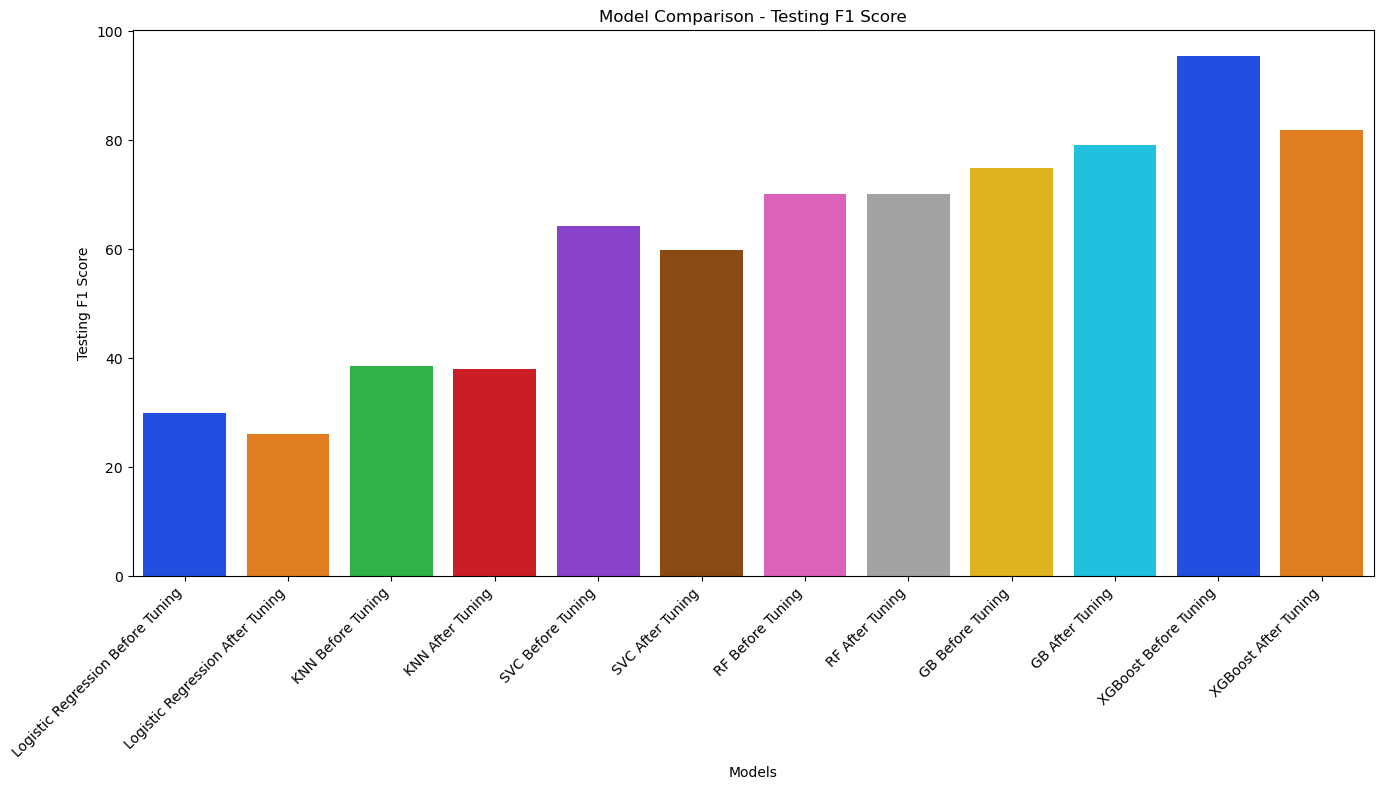

In [60]:
# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Model', y='Testing F1', palette='bright')
plt.title('Model Comparison - Testing F1 Score')
plt.xticks(rotation=45, ha='right')

# Customize the appearance
plt.xlabel('Models')
plt.ylabel('Testing F1 Score')
plt.tight_layout()
plt.show()

### Based on the visualization depicting the performance of models using the testing F1 score as our primary metric, we can confidently conclude that the XGBoost model provides the most reliable results for predicting churn as either 'Yes' or 'No'.

## 23. Feature Importance

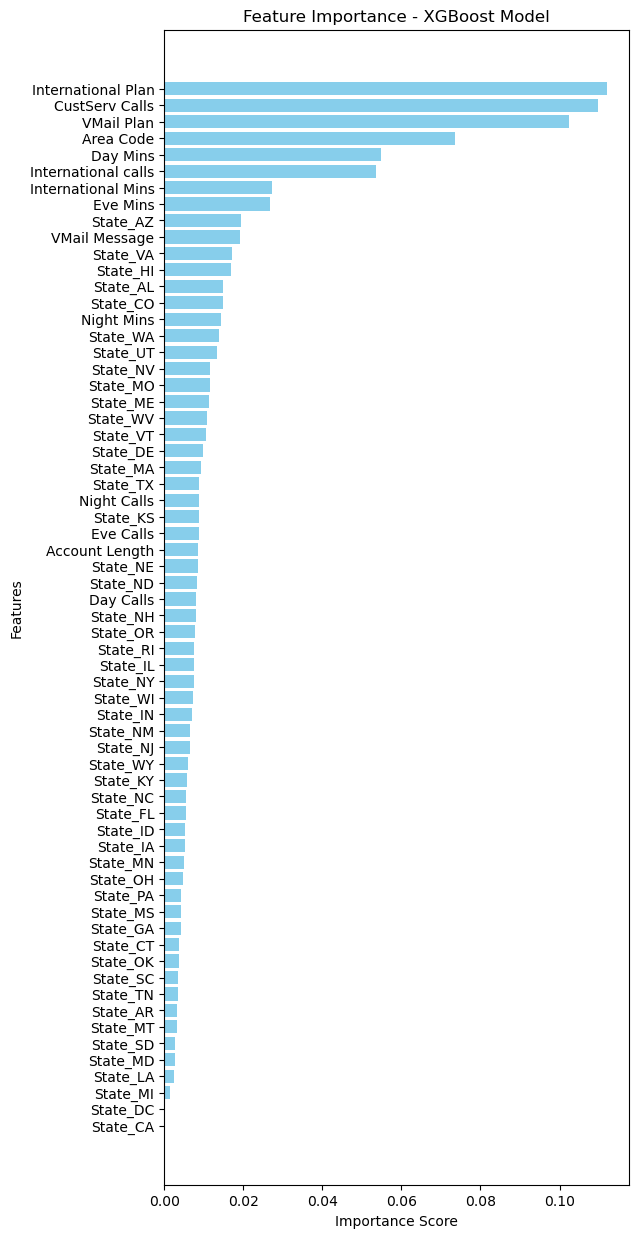

In [157]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(6, 15))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

## Project Goal -1: Understanding the variables that are influencing the customers to migrate:

1. International Plan: Customers who have opted for an international plan are more likely to churn. This suggests that international calling features may not be meeting their needs or expectations.

2. CustServ Calls: The number of customer service calls is a strong indicator of churn. Customers who frequently contact customer service are more likely to be dissatisfied with the service or experience issues, leading to churn.

3. VMail Plan: Customers with a voicemail plan also have a significant impact on churn. This suggests that the voicemail service may not be meeting their needs or that they are dissatisfied with its features or cost.

4. Area Code: The area code also seems to have some influence on churn. It's worth investigating whether customers from certain geographic regions are more likely to churn due to service quality, competition, or other factors.

5. Day Mins: The number of daytime minutes used by customers also contributes to churn. It could indicate dissatisfaction with call quality, pricing plans, or service offerings during peak hours.

6. International Calls: The number of international calls made by customers also contributes to migration. It suggests that customers with international calling needs may seek better options elsewhere.

7. Eve Minutes: Evening minutes used by customers are also influential. Similar to daytime minutes, dissatisfaction with evening service or pricing could drive migration.

8. State Variables: Certain states like Arizona, Alabama, Colorado, Hawaii, etc., appear in the list, indicating that geographic location may also influence migration patterns. Customers in specific states may have unique preferences or experiences driving their migration decisions.

## Project Goal - 2:- Creating Churn risk scores that can be indicative to drive retention campaigns:


In [155]:
# Sample feature importance scores
feature_scores = {
    'Feature':  [
    "International Plan", "CustServ Calls", "VMail Plan", "Area Code", "Day Mins",
    "International calls", "International Mins", "Eve Mins", "State_AZ", "VMail Message",
    "State_VA", "State_HI", "State_AL", "State_CO", "Night Mins", "State_WA", "State_UT",
    "State_NV", "State_MO", "State_ME", "State_WV", "State_VT", "State_DE", "State_MA",
    "State_TX", "Night Calls", "State_KS", "Eve Calls", "Account Length", "State_NE",
    "State_ND", "Day Calls", "State_NH", "State_OR", "State_RI", "State_IL", "State_NY",
    "State_WI", "State_IN", "State_NM", "State_NJ", "State_WY", "State_KY", "State_NC",
    "State_FL", "State_ID", "State_IA", "State_MN", "State_OH", "State_PA", "State_MS",
    "State_GA", "State_CT", "State_OK", "State_SC", "State_TN", "State_AR", "State_MT",
    "State_SD", "State_MD", "State_LA", "State_MI"
],
    'Churn Risk Score': [
    0.111997, 0.109837, 0.102312, 0.073437, 0.054734,
    0.053675, 0.027284, 0.026672, 0.019511, 0.019087,
    0.017078, 0.016922, 0.014950, 0.014925, 0.014436,
    0.013795, 0.013310, 0.011714, 0.011540, 0.011324,
    0.010765, 0.010642, 0.009767, 0.009211, 0.008803,
    0.008782, 0.008702, 0.008691, 0.008562, 0.008488,
    0.008216, 0.008145, 0.008131, 0.007764, 0.007667,
    0.007593, 0.007507, 0.007317, 0.007153, 0.006583,
    0.006575, 0.006104, 0.005653, 0.005577, 0.005434,
    0.005340, 0.005262, 0.004987, 0.004640, 0.004314,
    0.004247, 0.004183, 0.003842, 0.003717, 0.003506,
    0.003418, 0.003262, 0.003214, 0.002841, 0.002770,
    0.002608, 0.001476
]

}

# Create DataFrame
df_feature_scores = pd.DataFrame(feature_scores)

# Sort the DataFrame by Churn Risk Score in descending order
df_feature_scores = df_feature_scores.sort_values(by='Churn Risk Score', ascending=False)

# Display the DataFrame
df_feature_scores

,Feature,Churn Risk Score
0,International Plan,0.111997
1,CustServ Calls,0.109837
2,VMail Plan,0.102312
3,Area Code,0.073437
4,Day Mins,0.054734
5,International calls,0.053675
6,International Mins,0.027284
7,Eve Mins,0.026672
8,State_AZ,0.019511
9,VMail Message,0.019087


### <u>Based on the churn risk scores, we can suggest some points that can be indicative to drive retention campaigns:</u>

- International Plan, CustServ Calls, and VMail Plan have the highest churn risk scores, indicating that customers who have these features are more likely to churn. Retention campaigns could focus on providing special offers or incentives to retain customers with these features.
#### Communication and Usage Patterns:
- Day Mins, International calls, and International Mins also have significant churn risk scores. This suggests that customers who use more daytime minutes or make international calls may be at a higher risk of churning. Retention strategies could involve personalized communication plans or international calling packages to incentivize these customers to stay.
#### Geographical Insights:
- Certain states such as State_AZ, State_VA, and State_HI have relatively higher churn risk scores compared to others. Understanding the demographics and characteristics of customers in these states can help tailor retention campaigns more effectively.
#### Customer Engagement and Satisfaction:
- Features like Eve Mins, Night Mins, and Night Calls also contribute to churn risk. This could indicate that customers who are less engaged during evening hours or have frequent nighttime calls may need additional attention or engagement initiatives to improve satisfaction and reduce churn.
#### Service and Support Interactions:
- CustServ Calls, VMail Message, and Eve Calls are also significant contributors to churn risk. This underscores the importance of addressing customer service issues promptly, enhancing voicemail services, and improving overall call handling experiences to retain customers.
#### Tailored Retention Strategies:
- By analyzing churn risk scores across various features, retention campaigns can be customized and targeted to address specific customer needs and preferences. Personalized offers, loyalty programs, and proactive outreach initiatives can help mitigate churn and improve customer retention rates.

## Project Goal -3:- Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.
### We have already built an XGBoost model for predicting whether the outcome is 'Yes' or 'No' based on the provided features.



## 24. Challenges Faced:
- Data Quality: Ensuring the quality of the data posed a significant challenge, particularly with the telecom datasets. The data exhibited inconsistencies such as improper data formats, where numerical data were stored as strings or object datatypes. Addressing these formatting errors and other data discrepancies was imperative before proceeding with the analysis.

- Feature Selection: Identifying the most relevant features or variables that influence customer churn was challenging. It requires domain knowledge and thorough analysis to select the right set of predictors for the model.

- Imbalanced Data: Customer churn datasets were exhibiting class imbalance, where the number of churners is significantly lower than non-churners. Balancing the dataset to prevent bias towards the majority class was crucial for building an accurate predictive model.

- When tuning the hyperparameters, it was assumed that the testing F1 score would serve as the primary metric for comparing the performance of different models. This metric was chosen for its effectiveness in evaluating model performance and facilitating comparisons across various algorithms during parameter tuning. 